In [1]:
!pip install bioinfokit
#!pip install pandas
#!pip install seaborn
#!pip install scipy
#!pip install statsmodels
#!pip install numpy
#!pip install warnings

     ---------------------------------------- 0.0/88.1 kB ? eta -:--:--
     --------------------------- ------------ 61.4/88.1 kB 1.1 MB/s eta 0:00:01
     ---------------------------------------- 88.1/88.1 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ---------------------------------------- 40.3/40.3 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59336 sha256=40a4caa6e0075e978cf1d026a472fa67e6e318258d7503f8c48b7adcc8757434
  Stored in directory: c:\

In [2]:
#analysis following https://www.reneshbedre.com/blog/anova.html
#Loading post task data and recoding values
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from bioinfokit.analys import stat
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from statsmodels.formula.api import ols

In [ ]:
entry_data = pd.read_csv('entry_questionnaire_complete.csv', skiprows=[1])

new_column_names = {'Q1': 'age', 'Q2': 'gender', 'Q3': 'uni_year', 'Q4': 'freq_gen',
                    'Q6': 'dec_gen', 'Q7': 'fut_gen', 'Q8': 'often_gen', 'Q9': 'used_gen',
                    'Q10': 'habit_gen', 'Q14': 'freq_soft','Q16': 'dec_soft', 'Q17': 'fut_soft', 'Q18': 'often_soft',
                    'Q19': 'used_soft', 'Q20': 'habit_soft'}
entry_data = entry_data.rename(columns=new_column_names)

age_mean = entry_data['age'].mean()
age_std = entry_data['age'].std()

demographic_columns = ['gender', 'uni_year', 'freq_gen', 'freq_soft']
demographic_dict = {}
for column in demographic_columns:
    counts = entry_data[column].value_counts()
    percentages = counts / len(entry_data) * 100
    demographic_dict[column] = {'counts': counts, 'percentages': percentages}

intention_gen = entry_data[['dec_gen', 'fut_gen']].apply(pd.Series.value_counts)
intention_soft = entry_data[['dec_soft', 'fut_soft']].apply(pd.Series.value_counts)
habit_gen = entry_data[['often_gen', 'used_gen', 'habit_gen']].apply(pd.Series.value_counts)
habit_soft = entry_data[['often_soft', 'used_soft', 'habit_soft']].apply(pd.Series.value_counts)
print("Mean age:", age_mean)
print("Standard deviation of age:", age_std)
print("\nCounts and percentages:")
for column, values in demographic_dict.items():
    print(column)
    print("Counts:")
    print(values['counts'])
    print("Percentages:")
    print(values['percentages'])
    print("")
print("\nCounts for columns dec_gen and fut_gen:")
print(intention_gen)
print("\nCounts for columns dec_soft and fut_soft:")
print(intention_soft)
print("\nCounts for columns often_gen, used_gen, and habit_gen:")
print(habit_gen)
print("\nCounts for columns often_soft, used_soft, and habit_soft:")
print(habit_soft)


Mean age: 23.526315789473685
Standard deviation of age: 3.892563009589662

Counts and percentages:
gender
Counts:
Male      17
Female     2
Name: gender, dtype: int64
Percentages:
Male      89.473684
Female    10.526316
Name: gender, dtype: float64

uni_year
Counts:
Fourth year     9
Third year      4
Fifth Year      3
Postgraduate    3
Name: uni_year, dtype: int64
Percentages:
Fourth year     47.368421
Third year      21.052632
Fifth Year      15.789474
Postgraduate    15.789474
Name: uni_year, dtype: float64

freq_gen
Counts:
More than once a week    6
Almost every day         6
Once per week            4
At least once a month    3
Name: freq_gen, dtype: int64
Percentages:
More than once a week    31.578947
Almost every day         31.578947
Once per week            21.052632
At least once a month    15.789474
Name: freq_gen, dtype: float64

freq_soft
Counts:
More than once a week    10
Once per week             5
At least once a month     3
Almost every day          1
Name: freq_sof

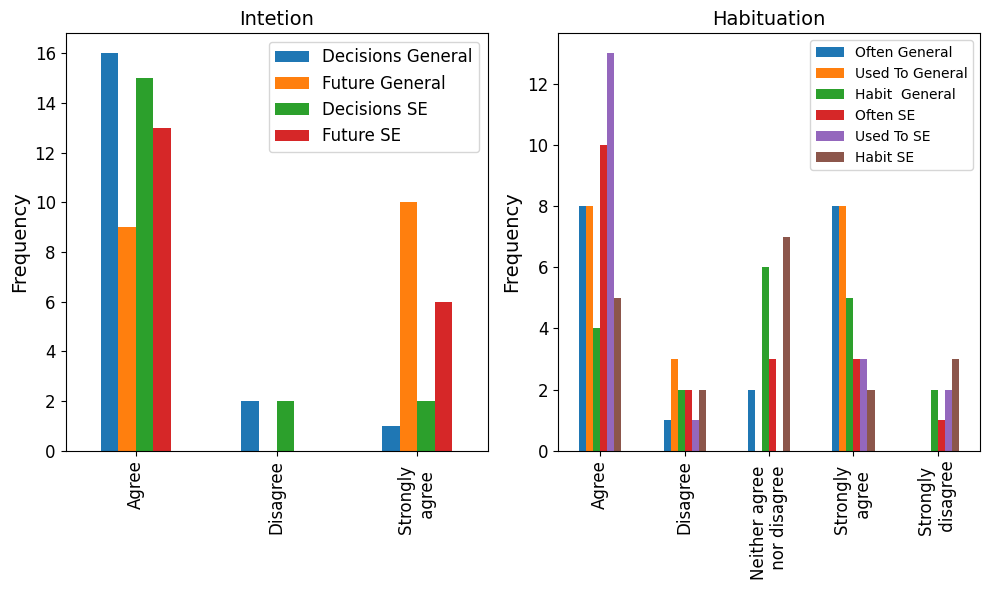

In [ ]:
plt.figure(figsize=(10, 6))
combined_intent = pd.concat([intention_gen, intention_soft], axis=1).rename(index={'Strongly agree': 'Strongly \n agree'})
combined_habit = pd.concat([habit_gen, habit_soft], axis=1).rename(index={'Strongly agree': 'Strongly \n agree',
                                                       'Strongly disagree': 'Strongly \n disagree',
                                                       'Neither agree nor disagree': 'Neither agree \n nor disagree'}
                                                )
intention_labels = ['Decisions General', 'Future General', 'Decisions SE', 'Future SE']
habit_labels = ['Often General', 'Used To General', 'Habit  General', 'Often SE', 'Used To SE', 'Habit SE']

plt.subplot(1, 2, 1)
combined_intent.plot(kind='bar', ax=plt.gca())
plt.legend(intention_labels,fontsize=12)
plt.title('Intetion', fontsize=14)
plt.xlabel('')
plt.ylabel('Frequency',fontsize=14)
plt.xticks(rotation=90,fontsize=12)
plt.gca().tick_params(axis='y', labelsize=12)

plt.subplot(1, 2, 2)
combined_habit.plot(kind='bar', ax=plt.gca())
plt.title('Habituation',fontsize=14)
plt.legend(habit_labels,fontsize=10)
plt.xlabel('')
plt.ylabel('Frequency',fontsize=14)
plt.xticks(rotation=90,fontsize=12)
plt.gca().tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

In [3]:
post_task_complete_df = pd.read_csv('post_task_data.csv')
new_column_names = {
    'Q55': 'ParticipantId',
    'Q57': 'Task'
}
recoded_values = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neither agree nor disagree': 3,
    'Agree': 4,
    'Strongly agree': 5,
    "Not at all": 0,
    "A little": 1,
    "Fairly": 2,
    "Very":3

}
post_task_complete_df.rename(columns=new_column_names, inplace=True)
post_task_complete_df = post_task_complete_df.replace(recoded_values)
post_task_complete_df


ParticipantId                       Task  \
0   Participant ID             Task completed   
1                1        Lecture Explanation   
2                1          Log Summarisation   
3                1  Commit Message Generation   
4                1                Code Review   
..             ...                        ...   
72              18        Lecture Explanation   
73              19  Commit Message Generation   
74              19                Code Review   
75              19        Lecture Explanation   
76              19          Log Summarisation   

                                           Q1  \
0   The task we asked you to perform was easy   
1                                           3   
2                                           2   
3                                           1   
4                                           2   
..                                        ...   
72                                          5   
73                                          5   
74                                          4   
75                                          5   
76                                          4   

                                                Q3  \
0   The task we asked you to perform was stressful   
1                                                1   
2                                                1   
3                                                3   
4                                                3   
..                                             ...   
72                                               2   
73                                               3   
74                                               2   
75                                               1   
76                                               1   

                                                  Q4  \
0   The task we asked you to perform was interesting   
1                                                  5   
2                                                  4   
3                                                  1   
4                                                  1   
..                                               ...   
72                                                 5   
73                                                 3   
74                                                 3   
75                                                 4   
76                                                 2   

                                            Q5  \
0   The task we asked you to perform was clear   
1                                            5   
2                                            4   
3                                            4   
4                                            4   
..                                         ...   
72                                           5   
73                                           5   
74                                           4   
75                                           5   
76                                           4   

                                               Q6  \
0   The task we asked you to perform was familiar   
1                                               3   
2                                               1   
3                                               2   
4                                               2   
..                                            ...   
72                                              4   
73                                              2   
74                                              4   
75                                              4   
76                                              2   

                                              Q7  \
0   I had enough time to do an effective search.   
1                                              4   
2                                              4   
3                                              2   
4      

In [20]:
import json
import csv

def save_dict_to_csv(file_name, user_content):
    with open(file_name, 'w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=user_content.keys())
        writer.writeheader()
        for i in range(len(user_content['message_text'])):
            row_data = {key: user_content[key][i] for key in user_content.keys()}
            writer.writerow(row_data)
    print(f'Data saved to {file_name}')

with open('interaction_data_complete.json', 'r') as file:
    interaction_data = json.load(file)


In [21]:
print(f'Number of interaction entries: {len(interaction_data)}')
print(f'Interaction data is of type:  {type(interaction_data)}')
print(f'An entry is of type: {type(interaction_data[0])}')
print(f'Each entry has the following keys: {interaction_data[0].keys()}')
print(f'Experiment data from an example entry are of type: {type(interaction_data[0]["experiment"])}')
print(f'Experiment data from an example entry have the following keys: {interaction_data[0]["experiment"].keys()}')
print(f'The task array in which interaction data are found in is of type: {type(interaction_data[0]["experiment"]["tasks"])}')
print(f'An example entry in task is of type: {type(interaction_data[0]["experiment"]["tasks"][0])}')
print(f'An example entry of task type has the following keys: {interaction_data[0]["experiment"]["tasks"][0].keys()}')
print(f'Events of a task entry are of type: {type(interaction_data[0]["experiment"]["tasks"][0]["events"])}')
print(f'An example of an event is of type: {type(interaction_data[0]["experiment"]["tasks"][0]["events"][0])}')
print(f'An example of a {interaction_data[0]["experiment"]["tasks"][0]["events"][0]["action"]} event has keys: {interaction_data[0]["experiment"]["tasks"][0]["events"][0].keys()}')
print(f'An example of a {interaction_data[0]["experiment"]["tasks"][0]["events"][1]["action"]} event has keys: {interaction_data[0]["experiment"]["tasks"][0]["events"][1].keys()}')
print('The different user actions are: user_send_message, model_response_hover_in, model_response_hover_out, message_thumbs_up, message_thumbs_down')

Number of interaction entries: 75
Interaction data is of type:  <class 'list'>
An entry is of type: <class 'dict'>
Each entry has the following keys: dict_keys(['_id', 'experiment'])
Experiment data from an example entry are of type: <class 'dict'>
Experiment data from an example entry have the following keys: dict_keys(['_id', 'startingTime', 'tasks', 'user', 'experimentCode', 'page'])
The task array in which interaction data are found in is of type: <class 'list'>
An example entry in task is of type: <class 'dict'>
An example entry of task type has the following keys: dict_keys(['taskid', 'taskName', 'events', 'parameters', 'startingTime'])
Events of a task entry are of type: <class 'list'>
An example of an event is of type: <class 'dict'>
An example of a user_send_message event has keys: dict_keys(['action', 'message', 'length', 'duration'])
An example of a model_response_hover_in event has keys: dict_keys(['action', 'message', 'timeDiff', 'index', 'input'])
The different user actio

In [22]:
#Create a dictionary to hold data to distiniguish between tasks
task_data = {}
user_message_content = {'message_text':[], 'task_code':[], 'participant_id':[], 'timeframe': []}#for qualitative analysis of user messages

for entry in interaction_data:
    task_code_part1, task_code_part2, participant_number = entry['_id'].split('_')
    task_code = task_code_part1 + '_' + task_code_part2

    task_info = entry['experiment']['tasks'][0]

    if task_code not in task_data:
        task_data[task_code] = {'participants': []}

    user_messages = []
    hover_out_grouped = {}
    hover_out_averaged = {}
    thumbs_up_count = 0
    thumbs_down_count = 0
    number_of_messages_count = 0
    for event in task_info['events']:
        if event['action'] == 'user_send_message':
            number_of_messages_count += 1
            user_messages.append({'length': event['length'], 'duration': event['duration']})
            user_message_content['message_text'].append(event['message'])
            user_message_content['task_code'].append(task_code)
            user_message_content['participant_id'].append(participant_number)
            if number_of_messages_count == 1:
              user_message_content['timeframe'].append('after_first')
            else:
              user_message_content['timeframe'].append('during_conv')

        elif event['action'] == 'model_response_hover_out':
            user_message = event['message']['text']
            read_duration = event['timeDiff']
            if user_message not in hover_out_grouped.keys():
                hover_out_grouped[user_message] = {'read_durations': []}
            hover_out_grouped[user_message]['read_durations'].append(read_duration)

        elif event['action'] == 'message_thumbs_up':
            thumbs_up_count += 1
        elif event['action'] == 'message_thumbs_down':
            thumbs_down_count += 1

    for message_index in range(len(hover_out_grouped.keys())):
        key = list(hover_out_grouped.keys())[message_index]
        read_duration_values = hover_out_grouped[key]['read_durations']
        hover_out_averaged[str(message_index)] = sum(read_duration_values) / len(read_duration_values)

    task_data[task_code]['participants'].append({
        'participant_number': participant_number,
        'number_of_messages': number_of_messages_count,
        'user_messages': user_messages,
        'hover_out_times': hover_out_averaged,
        'thumbs_up_count': thumbs_up_count,
        'thumbs_down_count': thumbs_down_count
    })
#save_dict_to_csv('user_message_content_after_11.csv', user_message_content)

In [23]:
#Create a dictionary to hold data between tasks and timeframes
task_data_timeframed = {}

for entry in interaction_data:
    task_code_part1, task_code_part2, participant_number = entry['_id'].split('_')
    task_code = task_code_part1 + '_' + task_code_part2

    task_info = entry['experiment']['tasks'][0]

    if task_code not in task_data_timeframed:
        task_data_timeframed[task_code] = {'participants': []}

    user_messages = {}
    hover_out_grouped = {}
    hover_out_averaged = {}
    thumbs_up_counts = {}
    thumbs_down_counts = {}
    thumbs_up_count_during = 0
    thumbs_down_count_during = 0
    number_of_messages_count = 0
    last_user_message = sum(1 for event in task_info['events'] if event['action'] == 'user_send_message')
    for event in task_info['events']:
        if event['action'] == 'user_send_message':
          if number_of_messages_count == 0:
            number_of_messages_count += 1
            if 'after_first' not in  user_messages.keys():
              user_messages['after_first']= {'length': event['length'], 'duration': event['duration']}
          else:
            number_of_messages_count += 1
            if 'during_conv' not in  user_messages.keys():
              user_messages['during_conv'] = []
            user_messages['during_conv'].append({'length': event['length'], 'duration': event['duration']})

        elif event['action'] == 'model_response_hover_out':
            system_message = event['message']['text']
            read_duration = event['timeDiff']

            if number_of_messages_count == 1:
              if system_message not in hover_out_grouped.keys():
                hover_out_grouped[system_message] = {}
              if 'after_first' not in  hover_out_grouped[system_message].keys():
                hover_out_grouped[system_message]['after_first'] = {'read_durations': []}
              hover_out_grouped[system_message]['after_first']['read_durations'].append(read_duration)

            elif number_of_messages_count == last_user_message:
              if system_message not in hover_out_grouped.keys():
                hover_out_grouped[system_message] = {}
              if 'end_conv' not in  hover_out_grouped[system_message].keys():
                hover_out_grouped[system_message]['end_conv'] = {'read_durations': []}
              hover_out_grouped[system_message]['end_conv']['read_durations'].append(read_duration)

            else:
                if system_message not in hover_out_grouped.keys():
                  hover_out_grouped[system_message] = {}
                if 'during_conv' not in  hover_out_grouped[system_message].keys():
                  hover_out_grouped[system_message]['during_conv'] = {'read_durations': []}
                hover_out_grouped[system_message]['during_conv']['read_durations'].append(read_duration)


        elif event['action'] == 'message_thumbs_up':
          if number_of_messages_count == 1:
            thumbs_up_counts['after_first'] = 1
          elif number_of_messages_count == last_user_message:
            thumbs_up_counts['end_conv'] = 1
          else:
             thumbs_up_count_during += 1
             thumbs_up_counts['during_conv'] = thumbs_up_count_during

        elif event['action'] == 'message_thumbs_down':
          if number_of_messages_count == 1:
            thumbs_down_counts['after_first'] = 1
          elif number_of_messages_count == last_user_message:
            thumbs_down_counts['end_conv'] = 1
          else:
             thumbs_down_count_during += 1
             thumbs_down_counts['during_conv'] = thumbs_up_count_during

    for message_index in range(len(hover_out_grouped.keys())):
        message = list(hover_out_grouped.keys())[message_index]
        if str(message_index) not in hover_out_averaged.keys():
           hover_out_averaged[str(message_index)] = []
        for timeframe in hover_out_grouped[message].keys():
          read_duration_values = hover_out_grouped[message][timeframe]['read_durations']
          hover_out_averaged[str(message_index)].append({timeframe: sum(read_duration_values) / len(read_duration_values)})

    task_data_timeframed[task_code]['participants'].append({
        'participant_number': participant_number,
        'number_of_messages': number_of_messages_count,
        'user_messages': user_messages,
        'hover_out_times': hover_out_averaged,
        'thumbs_up_count': thumbs_up_counts,
        'thumbs_down_count': thumbs_down_counts
    })

task_data_timeframed

{'lec_exp': {'participants': [{'participant_number': '01',
    'number_of_messages': 5,
    'user_messages': {'after_first': {'length': 47, 'duration': 66896},
     'during_conv': [{'length': 4, 'duration': 10793},
      {'length': 30, 'duration': 39374},
      {'length': 32, 'duration': 56618},
      {'length': 17, 'duration': 32708}]},
    'hover_out_times': {'0': [{'after_first': 66423.0},
      {'during_conv': 3605.0}],
     '1': [{'during_conv': 39443.666666666664}],
     '2': [{'during_conv': 7359.666666666667}],
     '3': [{'during_conv': 64892.0}, {'end_conv': 9202.5}],
     '4': [{'end_conv': 13943.0}]},
    'thumbs_up_count': {'during_conv': 2},
    'thumbs_down_count': {}},
   {'participant_number': '02',
    'number_of_messages': 9,
    'user_messages': {'after_first': {'length': 8, 'duration': 6542},
     'during_conv': [{'length': 7, 'duration': 14360},
      {'length': 8, 'duration': 14488},
      {'length': 9, 'duration': 17229},
      {'length': 4, 'duration': 79499},


In [24]:
print(type(task_data[task_code]['participants'][0]))
print(type(task_data[task_code]['participants'][0]['participant_number']))
print(type(task_data[task_code]['participants'][0]['number_of_messages']))
print(type(task_data[task_code]['participants'][0]['user_messages']))
print(type(task_data[task_code]['participants'][0]['hover_out_times']))
print(type(task_data[task_code]['participants'][0]['thumbs_up_count']))
print(type(task_data[task_code]['participants'][0]['thumbs_down_count']))
print(task_data[task_code]['participants'][0]['hover_out_times'])
print(task_data[task_code]['participants'][0]['user_messages'])

<class 'dict'>
<class 'str'>
<class 'int'>
<class 'list'>
<class 'dict'>
<class 'int'>
<class 'int'>
{'0': 1274.0, '1': 16434.0, '2': 4771.166666666667, '3': 4396.5, '4': 3966.5, '5': 5111.333333333333, '6': 17435.0}
[{'length': 37, 'duration': 70077}, {'length': 797, 'duration': 9658}, {'length': 40, 'duration': 71242}, {'length': 8, 'duration': 18341}, {'length': 9, 'duration': 12183}, {'length': 159, 'duration': 13211}, {'length': 10, 'duration': 14218}]


In [25]:
#Create pandas dataset for analysis between tasks
import pandas as pd
timeframe_list = ['after_first','during_conv','end_conv']
participant_ids = []
timeframes = []
task_codes = []
num_messages = []
timed_num_messages = []
average_formulation_time = []
average_length = []
average_reading_time = []
thumbs_up_count = []
thumbs_down_count = []

for task_code, task_info in task_data_timeframed.items():
    for participant in task_info['participants']:
      for timeframe_entry in timeframe_list:
        participant_id = participant['participant_number']
        timeframe = timeframe_entry
        num_messages_value = participant['number_of_messages']
        thumbs_up_count_value = participant['thumbs_up_count'].get(timeframe_entry, 0)
        thumbs_down_count_value = participant['thumbs_down_count'].get(timeframe_entry, 0)
        user_messages = participant['user_messages'].get(timeframe_entry, 0)
        if timeframe_entry == 'after_first':
          timed_num_messages_value = 1
        elif timeframe_entry == 'end_conv':
          timed_num_messages_value = 0
        else:
          timed_num_messages_value = num_messages_value - 1

        if user_messages != 0:
          if timeframe_entry == 'after_first':
            average_length_value = user_messages['length']
            average_formulation_time_value = user_messages['duration']/1000
          else:
            average_length_value = sum(entry['length'] for entry in user_messages) / len(user_messages)
            average_formulation_time_value = (sum(entry['duration'] for entry in user_messages) / len(user_messages))/1000
        else:
            average_length_value = 0
            average_formulation_time_value = 0

        hover_out_times = participant['hover_out_times']
        hover_out_times_timeframed = {}
        for  key, value in hover_out_times.items():
          for entry in value:
            if timeframe_entry in entry.keys():
              hover_out_times_timeframed[key] = entry[timeframe_entry]
        if not hover_out_times_timeframed:
          average_reading_time_value = 0
        else:
          average_reading_time_value = (sum(hover_out_times_timeframed.values()) / len(hover_out_times_timeframed))/1000


        participant_ids.append(participant_id)
        timeframes.append(timeframe)
        task_codes.append(task_code)
        num_messages.append(num_messages_value)
        timed_num_messages.append(timed_num_messages_value)
        average_formulation_time.append(average_formulation_time_value)
        average_length.append(average_length_value)
        average_reading_time.append(average_reading_time_value)
        thumbs_up_count.append(thumbs_up_count_value)
        thumbs_down_count.append(thumbs_down_count_value)

data = {
    'participant_id': participant_ids,
    'timeframe': timeframes,
    'task_code': task_codes,
    'number_of_messages': num_messages,
    'timeframed_number_of_messages': timed_num_messages,
    'average_formulation_time': average_formulation_time,
    'average_length': average_length,
    'average_reading_time': average_reading_time,
    'thumbs_up_count': thumbs_up_count,
    'thumbs_down_count': thumbs_down_count
}

interaction_dataframe_timeframed = pd.DataFrame(data)

print(interaction_dataframe_timeframed)


    participant_id    timeframe task_code  number_of_messages  \
0               01  after_first   lec_exp                   5   
1               01  during_conv   lec_exp                   5   
2               01     end_conv   lec_exp                   5   
3               02  after_first   lec_exp                   9   
4               02  during_conv   lec_exp                   9   
..             ...          ...       ...                 ...   
220             18  during_conv   com_mes                   6   
221             18     end_conv   com_mes                   6   
222             19  after_first   com_mes                   9   
223             19  during_conv   com_mes                   9   
224             19     end_conv   com_mes                   9   

     timeframed_number_of_messages  average_formulation_time  average_length  \
0                                1                  66.89600          47.000   
1                                4                  34.8732

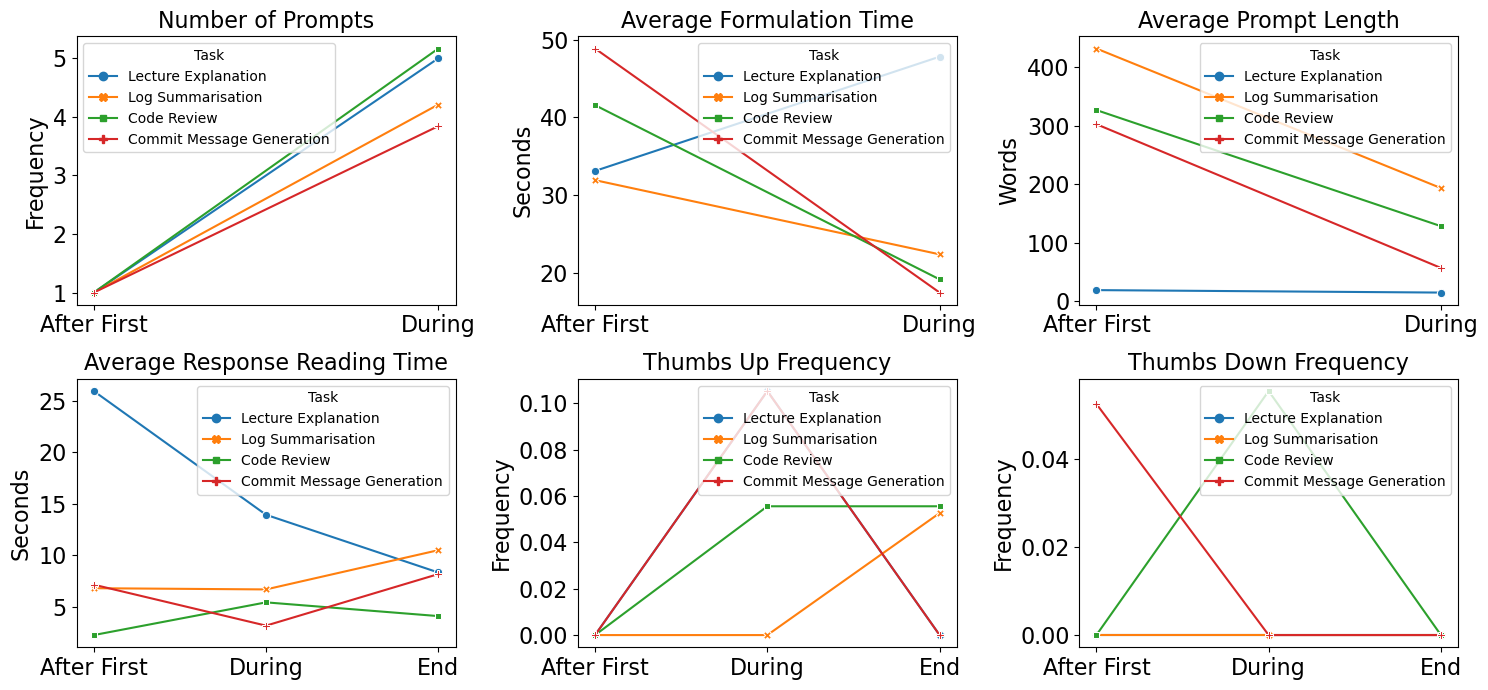

In [29]:
#Plot interaction results
tasks = interaction_dataframe_timeframed['task_code'].unique()
fig, axs = plt.subplots(2, 3, figsize=(15, 7))

column_groups = [
    ('timeframed_number_of_messages', 'Number of Prompts'),
    ('average_formulation_time', 'Average Formulation Time'),
    ('average_length', 'Average Prompt Length'),
    ('average_reading_time', 'Average Response Reading Time'),
    ('thumbs_up_count', 'Thumbs Up Frequency'),
    ('thumbs_down_count', 'Thumbs Down Frequency')
]

timeframe_labels = {
    'after_first': 'After First',
    'during_conv': 'During',
    'end_conv': 'End'
}

task_labels = {
    'lec_exp': 'Lecture Explanation',
    'com_mes': 'Commit Message Generation',
    'code_rev': 'Code Review',
    'log_sum': 'Log Summarisation'
}

for i, (column, title) in enumerate(column_groups):
    row = i // 3
    col = i % 3

    if column in ['timeframed_number_of_messages', 'average_formulation_time', 'average_length']:
        timeframes = ['after_first', 'during_conv']
    else:
        timeframes = ['after_first', 'during_conv', 'end_conv']

    melted_df = interaction_dataframe_timeframed[interaction_dataframe_timeframed['timeframe'].isin(timeframes)].melt(id_vars=['participant_id', 'timeframe', 'task_code'],
                        var_name='Metric',
                        value_name='Value',
                        value_vars=[column])

    sns.lineplot(data=melted_df,
                 x='timeframe',
                 y='Value',
                 hue='task_code',
                 style='task_code',
                 markers=True,
                 dashes=False,
                 errorbar=None,
                 ax=axs[row, col])

    axs[row, col].set_title(title, fontsize=16)
    axs[row, col].set_xlabel('')
    if '_time' in column:
      axs[row, col].set_ylabel('Seconds',fontsize=16)
    elif '_length' in column:
      axs[row, col].set_ylabel('Words',fontsize=16)
    else:
      axs[row, col].set_ylabel('Frequency',fontsize=16)


    axs[row, col].set_xticklabels([timeframe_labels[tf] for tf in timeframes],fontsize=16)
    legend = axs[row, col].legend(title='Task',fontsize=10, title_fontsize=10)
    axs[row, col].tick_params(axis='y', labelsize=16)
    for label in legend.texts:
        label.set_text(task_labels[label.get_text()])


plt.tight_layout()
plt.show()

In [ ]:
#Testing and assumption functions
#import pingouin as pg
def anova_assumption_checks(dict_of_results, bartlett_dict):
  for item,res in dict_of_results.items():
    print(f"-----{item}-----")
    sm.qqplot(res.anova_std_residuals, line='45')
    plt.xlabel("Quantiles")
    plt.ylabel("Residuals")
    plt.show()

    plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
    plt.xlabel("Residuals")
    plt.ylabel('Frequency')
    plt.show()

  print(bartlett_dict[item].bartlett_summary)
def two_way_anova_test(dataframe_to_test,list_of_items,column_names_to_change):
  bartlett_res_dict = {}
  res_dict = {}
  renamed_dataframe_to_test = dataframe_to_test.rename(columns=column_names_to_change)
  for item in list_of_items:
    columns_to_select = ['Task'] + [col for col in renamed_dataframe_to_test.columns if item in col]
    df_to_test = renamed_dataframe_to_test[columns_to_select]
    df_to_test_melted = pd.melt(df_to_test, id_vars=['Task'], value_vars=[item+'_before',item+'_first',item+'_during',item+'_end'])
    df_to_test_melted.columns = ['Task','timeframe','values']
    df_to_test_melted['values'] = pd.to_numeric(df_to_test_melted['values'], errors='coerce')

    res = stat()
    bartlett_res = stat()
    res.anova_stat(df=df_to_test_melted, res_var='values', anova_model='values~C(Task)+C(timeframe)')
    bartlett_res.bartlett(df=df_to_test_melted,res_var="values",xfac_var='Task')
    res_dict[item] = res
    bartlett_res_dict[item] = bartlett_res
    print(f"-----{item}-----")
    print(res.anova_summary)
  return res_dict, bartlett_res_dict

def two_way_anova_test_interaction(dataframe_to_test,list_of_items,list_of_timeframes):
  bartlett_res_dict = {}
  res_dict = {}
  for item in list_of_items:
    columns_to_select = ['task_code', 'timeframe'] + [col for col in dataframe_to_test.columns if item in col]
    df_to_test = dataframe_to_test[columns_to_select]
    filtered_df_to_test = df_to_test[df_to_test['timeframe'].isin(list_of_timeframes)]
    res = stat()
    bartlett_res = stat()
    res.anova_stat(df=filtered_df_to_test, res_var=item, anova_model=str(item) + '~C(task_code)+C(timeframe)')
    bartlett_res.bartlett(df=filtered_df_to_test,res_var=item,xfac_var='task_code')
    res_dict[item] = res
    bartlett_res_dict[item] = bartlett_res
    print(f"-----{item}-----")
    print(res.anova_summary)
  return res_dict, bartlett_res_dict

def tukey_hsd_test(dataframe_to_test,list_of_items,column_names_to_change,significant_effects):
  res_dict = {}
  sig_res_dict = {}
  renamed_dataframe_to_test = dataframe_to_test.rename(columns=column_names_to_change)
  for item in significant_effects:
    columns_to_select = ['Task'] + [col for col in renamed_dataframe_to_test.columns if item in col]
    df_to_test = renamed_dataframe_to_test[columns_to_select]
    df_to_test_melted = pd.melt(df_to_test, id_vars=['Task'], value_vars=[item+'_before',item+'_first',item+'_during',item+'_end'])
    df_to_test_melted.columns = ['Task','timeframe','values']
    df_to_test_melted['values'] = pd.to_numeric(df_to_test_melted['values'], errors='coerce')

    tukey_res = stat()
    tukey_res.tukey_hsd(df=df_to_test_melted, res_var='values', xfac_var='Task',anova_model='values~C(Task)+C(timeframe)')
    res_dict[item+'_Task'] = tukey_res
    task_summary_df = tukey_res.tukey_summary
    sig_res_dict[item+'_Task'] = task_summary_df[task_summary_df['p-value'] <= 0.05]

    tukey_res.tukey_hsd(df=df_to_test_melted, res_var='values', xfac_var='timeframe',anova_model='values~C(Task)+C(timeframe)')
    res_dict[item+'_timeframe'] = tukey_res
    timeframe_summary_df = tukey_res.tukey_summary
    sig_res_dict[item+'_timeframe'] = timeframe_summary_df[timeframe_summary_df['p-value'] <= 0.05]
  return res_dict, sig_res_dict

def tukey_hsd_test_interaction(dataframe_to_test,list_of_items,list_of_timeframes,significant_effects):
  res_dict = {}
  sig_res_dict = {}
  for item in significant_effects:
    columns_to_select = ['task_code', 'timeframe'] + [col for col in dataframe_to_test.columns if item in col]
    df_to_test = dataframe_to_test[columns_to_select]
    filtered_df_to_test = df_to_test[df_to_test['timeframe'].isin(list_of_timeframes)]

    tukey_res = stat()
    tukey_res.tukey_hsd(df=filtered_df_to_test, res_var=item, xfac_var='task_code',anova_model=str(item)+'~C(task_code)+C(timeframe)')
    res_dict[item+'_task_code'] = tukey_res
    task_summary_df = tukey_res.tukey_summary
    sig_res_dict[item+'_task_code'] = task_summary_df[task_summary_df['p-value'] <= 0.05]

    tukey_res.tukey_hsd(df=filtered_df_to_test, res_var=item, xfac_var='timeframe',anova_model=str(item)+'~C(task_code)+C(timeframe)')
    res_dict[item+'_timeframe'] = tukey_res
    timeframe_summary_df = tukey_res.tukey_summary
    sig_res_dict[item+'_timeframe'] = timeframe_summary_df[timeframe_summary_df['p-value'] <= 0.05]
  return res_dict, sig_res_dict

In [ ]:
def tukey_hsd_test_tp(dataframe_to_test, list_of_items, significant_effects):
    res_dict = {}
    sig_res_dict = {}

    for item in significant_effects:
        columns_to_select = ['Task'] + [col for col in dataframe_to_test.columns if item in col]
        df_to_test = dataframe_to_test[columns_to_select]
        df_to_test[item] = pd.to_numeric(df_to_test[item], errors='coerce')

        print(df_to_test.head())
        tukey_res = stat()
        tukey_res.tukey_hsd(df=df_to_test, res_var=item, xfac_var='Task',anova_model=str(item)+'~C(Task)')
        res_dict[item+'_Task'] = tukey_res
        task_summary_df = tukey_res.tukey_summary
        sig_res_dict[item+'_Task'] = task_summary_df[task_summary_df['p-value'] <= 0.05]

    return res_dict, sig_res_dict

significant_effects = ['easy', 'stressful', 'interesting', 'clear', 'familiar', 'enough_time']

res_dict, sig_res_dict = tukey_hsd_test_tp(task_perception_df, significant_effects, significant_effects)

for key, value in sig_res_dict.items():
    print(f"\nSignificant effects for {key}:\n{value}")


                        Task  easy
1        Lecture Explanation     3
2          Log Summarisation     2
3  Commit Message Generation     1
4                Code Review     2
5          Log Summarisation     3
                        Task  stressful
1        Lecture Explanation          1
2          Log Summarisation          1
3  Commit Message Generation          3
4                Code Review          3
5          Log Summarisation          2
                        Task  interesting
1        Lecture Explanation            5
2          Log Summarisation            4
3  Commit Message Generation            1
4                Code Review            1
5          Log Summarisation            4
                        Task  clear
1        Lecture Explanation      5
2          Log Summarisation      4
3  Commit Message Generation      4
4                Code Review      4
5          Log Summarisation      4
                        Task  familiar
1        Lecture Explanation         3
2   

-----timeframed_number_of_messages-----
                 df      sum_sq     mean_sq           F        PR(>F)
C(task_code)    3.0   11.201228    3.733743    1.088477  3.560403e-01
C(timeframe)    1.0  471.706667  471.706667  137.514011  9.387989e-23
Residual      145.0  497.385439    3.430244         NaN           NaN
-----average_formulation_time-----
                 df         sum_sq      mean_sq         F    PR(>F)
C(task_code)    3.0    3666.554104  1222.184701  1.185905  0.317299
C(timeframe)    1.0    5434.363868  5434.363868  5.273049  0.023091
Residual      145.0  149435.878073  1030.592263       NaN       NaN
-----average_length-----
                 df        sum_sq       mean_sq          F        PR(>F)
C(task_code)    3.0  1.763553e+06  5.878511e+05  12.751708  1.919044e-07
C(timeframe)    1.0  1.104363e+06  1.104363e+06  23.955915  2.593839e-06
Residual      145.0  6.684470e+06  4.609979e+04        NaN           NaN
-----average_reading_time-----
                 df      

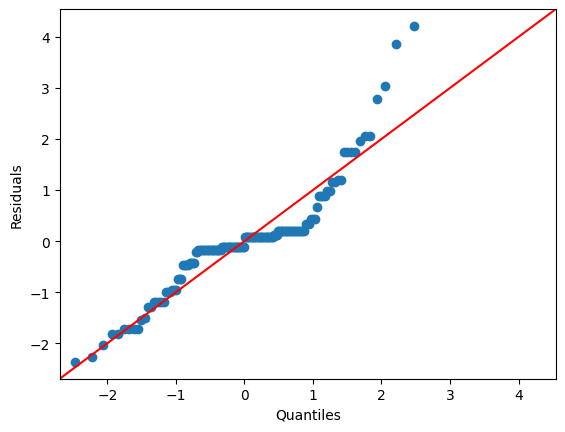

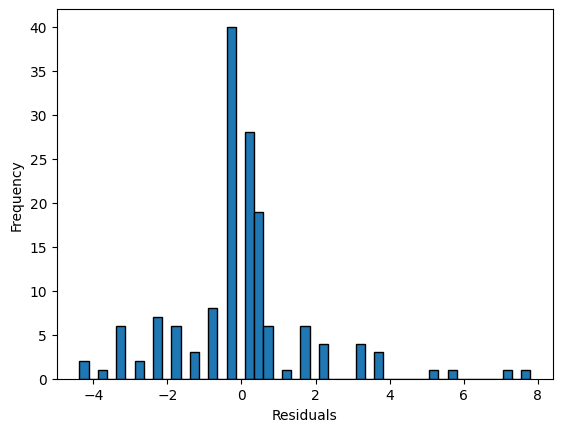

-----average_formulation_time-----


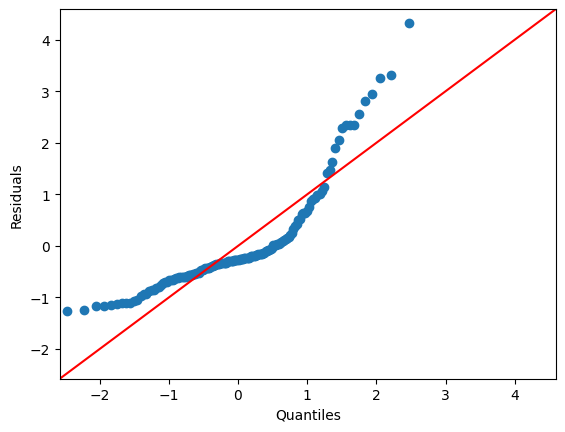

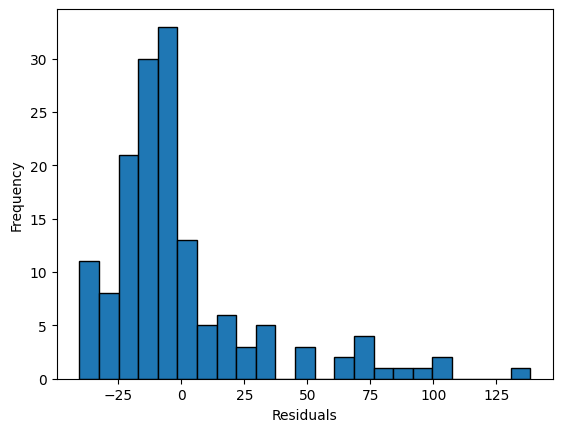

-----average_length-----


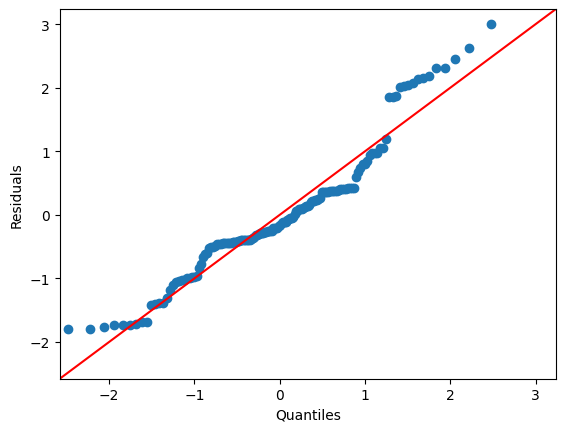

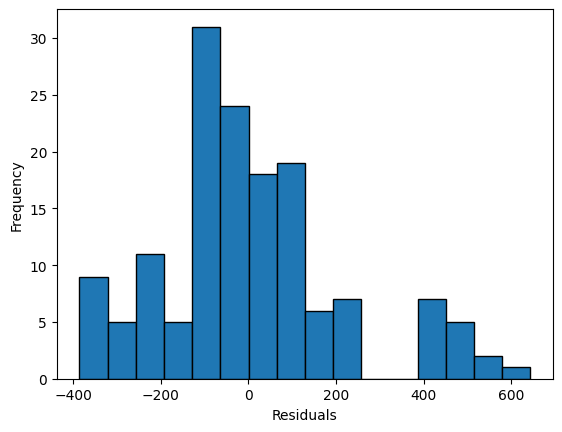

                 Parameter     Value
0      Test statistics (T)  191.8301
1  Degrees of freedom (Df)    3.0000
2                  p value    0.0000
-----average_reading_time-----


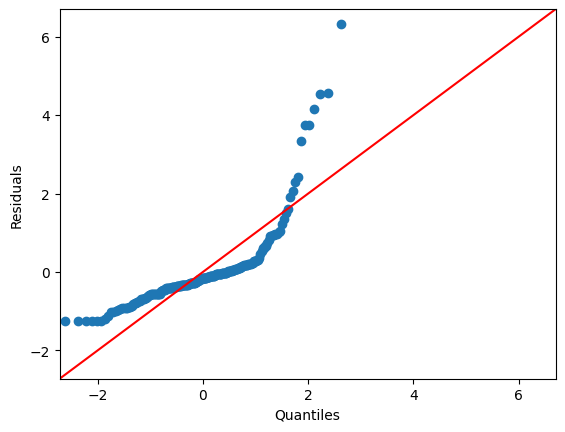

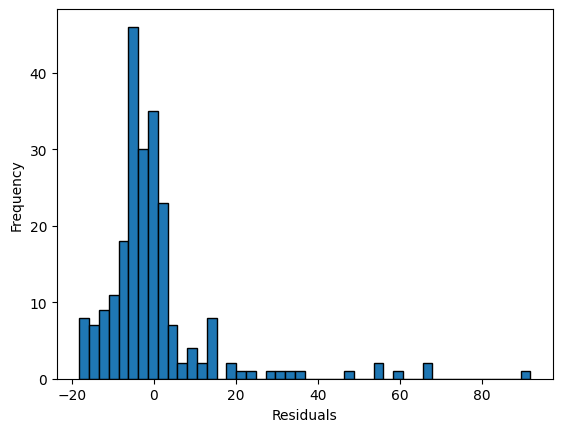

-----thumbs_up_count-----


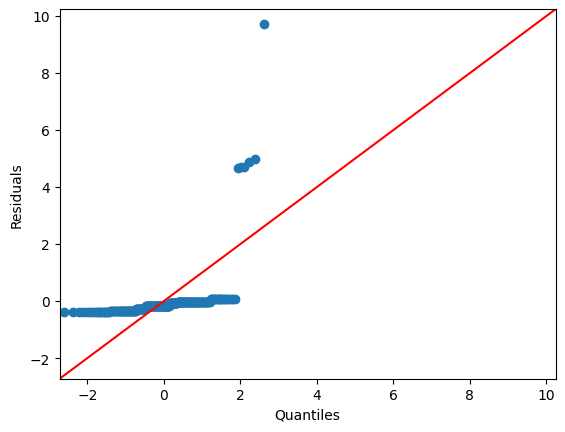

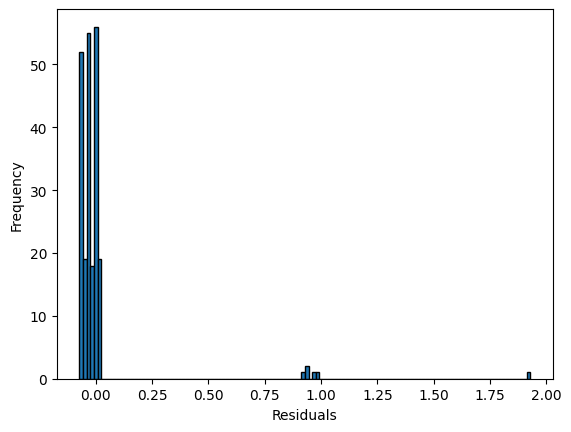

-----thumbs_down_count-----


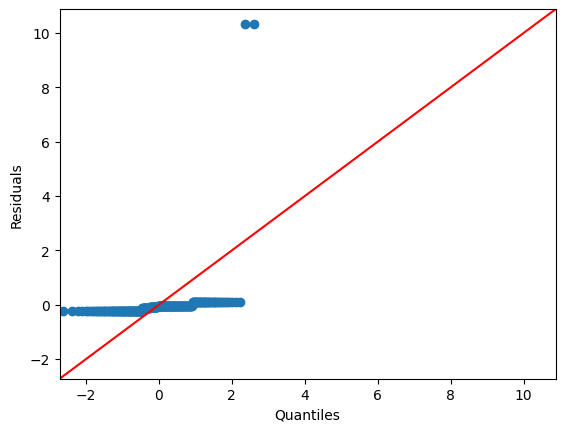

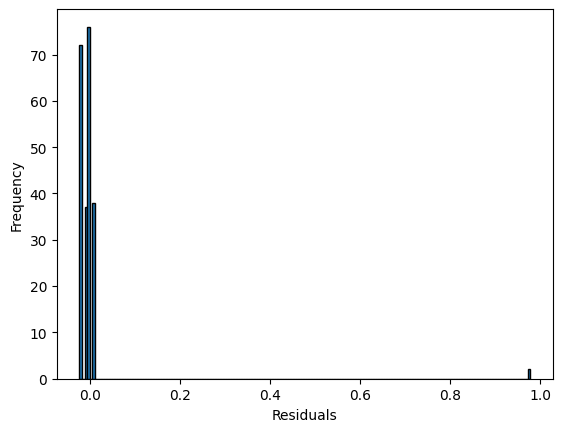

                 Parameter  Value
0      Test statistics (T)    inf
1  Degrees of freedom (Df)    3.0
2                  p value    0.0


In [ ]:
#Analyse interaction data
two_timeframes = ['after_first', 'during_conv']
all_timeframes = ['after_first', 'during_conv', 'end_conv']
interaction_items_two_timeframes = ['timeframed_number_of_messages', 'average_formulation_time', 'average_length']
interaction_items_all_timeframes = ['average_reading_time', 'thumbs_up_count', 'thumbs_down_count']
interaction_results_two_timeframes, interaction_barlett_results_two_timeframes = two_way_anova_test_interaction(
    interaction_dataframe_timeframed, interaction_items_two_timeframes,two_timeframes
    )
interaction_results_all_timeframes, interaction_barlett_results_all_timeframes = two_way_anova_test_interaction(
    interaction_dataframe_timeframed, interaction_items_all_timeframes,all_timeframes
    )

anova_assumption_checks(interaction_results_two_timeframes,interaction_barlett_results_two_timeframes)
anova_assumption_checks(interaction_results_all_timeframes,interaction_barlett_results_all_timeframes)

In [ ]:
significant_effects_two_timeframes = ['timeframed_number_of_messages','average_formulation_time','average_length']
significant_effects_all_timeframes = ['average_reading_time']
post_comp_results_two_timeframes, post_comp_sig_res_two_timeframes = tukey_hsd_test_interaction(
    interaction_dataframe_timeframed,interaction_items_two_timeframes,two_timeframes,significant_effects_two_timeframes
    )
post_comp_results_all_timeframes, post_comp_sig_res_all_timeframes = tukey_hsd_test_interaction(
    interaction_dataframe_timeframed,interaction_items_all_timeframes,all_timeframes,significant_effects_all_timeframes
    )
for key, value in post_comp_sig_res_two_timeframes.items():
  print('-----------------------'+str(key)+'-----------------------')
  print(value)

for key, value in post_comp_sig_res_all_timeframes.items():
  print('-----------------------'+str(key)+'-----------------------')
  print(value)

anova_assumption_checks(cog_result_dict,cog_bartlett_dict)

-----------------------timeframed_number_of_messages_task_code-----------------------
Empty DataFrame
Columns: [group1, group2, Diff, Lower, Upper, q-value, p-value]
Index: []
-----------------------timeframed_number_of_messages_timeframe-----------------------
        group1       group2      Diff     Lower     Upper    q-value  p-value
0  after_first  during_conv  3.546667  2.948896  4.144438  16.583969    0.001
-----------------------average_formulation_time_task_code-----------------------
Empty DataFrame
Columns: [group1, group2, Diff, Lower, Upper, q-value, p-value]
Index: []
-----------------------average_formulation_time_timeframe-----------------------
        group1       group2       Diff     Lower      Upper   q-value  p-value
0  after_first  during_conv  12.038122  1.676786  22.399457  3.247476  0.02309
-----------------------average_length_task_code-----------------------
    group1    group2        Diff       Lower       Upper   q-value   p-value
0  lec_exp   log_sum  29

In [ ]:
#Task perception items
task_perception_columns = ['ParticipantId', 'Task', 'Q1', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7']
meaningfull_column_names = {
    'ParticipantId': 'ParticipantId',
    'Task': 'Task',
    'Q1': 'easy',
    'Q3': 'stressful',
    'Q4': 'interesting',
    'Q5': 'clear',
    'Q6': 'familiar',
    'Q7': 'enough_time'
}

columns_to_average_tp = ['easy','stressful','interesting','clear','familiar','enough_time']
task_perception_df = post_task_complete_df[task_perception_columns]
task_perception_df.drop(0, inplace=True)
task_perception_df.rename(columns=meaningfull_column_names, inplace=True)
print(task_perception_df.head())
task_averages_tp = task_perception_df.groupby('Task')[columns_to_average_tp].agg(["mean","std"])
task_averages_tp

  ParticipantId                       Task easy stressful interesting clear  \
1             1        Lecture Explanation    3         1           5     5   
2             1          Log Summarisation    2         1           4     4   
3             1  Commit Message Generation    1         3           1     4   
4             1                Code Review    2         3           1     4   
5             2          Log Summarisation    3         2           4     4   

  familiar enough_time  
1        3           4  
2        1           4  
3        2           2  
4        2           4  
5        1           5  


easy           stressful           interesting  \
                               mean       std      mean       std        mean   
Task                                                                            
Code Review                2.789474  1.182227  2.947368  1.078769    3.894737   
Commit Message Generation  3.631579  1.116071  2.315789  0.885226    3.842105   
Lecture Explanation        4.105263  0.737468  2.157895  1.014515    4.578947   
Log Summarisation          3.000000  1.054093  2.736842  1.240166    4.263158   

                                        clear            familiar            \
                                std      mean       std      mean       std   
Task                                                                          
Code Review                0.936586  4.052632  0.848115  3.210526  1.031662   
Commit Message Generation  0.898342  4.263158  0.733493  3.210526  1.031662   
Lecture Explanation        0.606977  4.421053  0.692483  4.157895  0.764719   
Log Summarisation          0.871914  3.947368  0.705036  2.157895  0.898342   

                          enough_time            
                                 mean       std  
Task                                             
Code Review                  2.578947  1.070607  
Commit Message Generation    4.210526  0.976328  
Lecture Explanation          4.105263  0.657836  
Log Summarisation            4.052632  0.911268

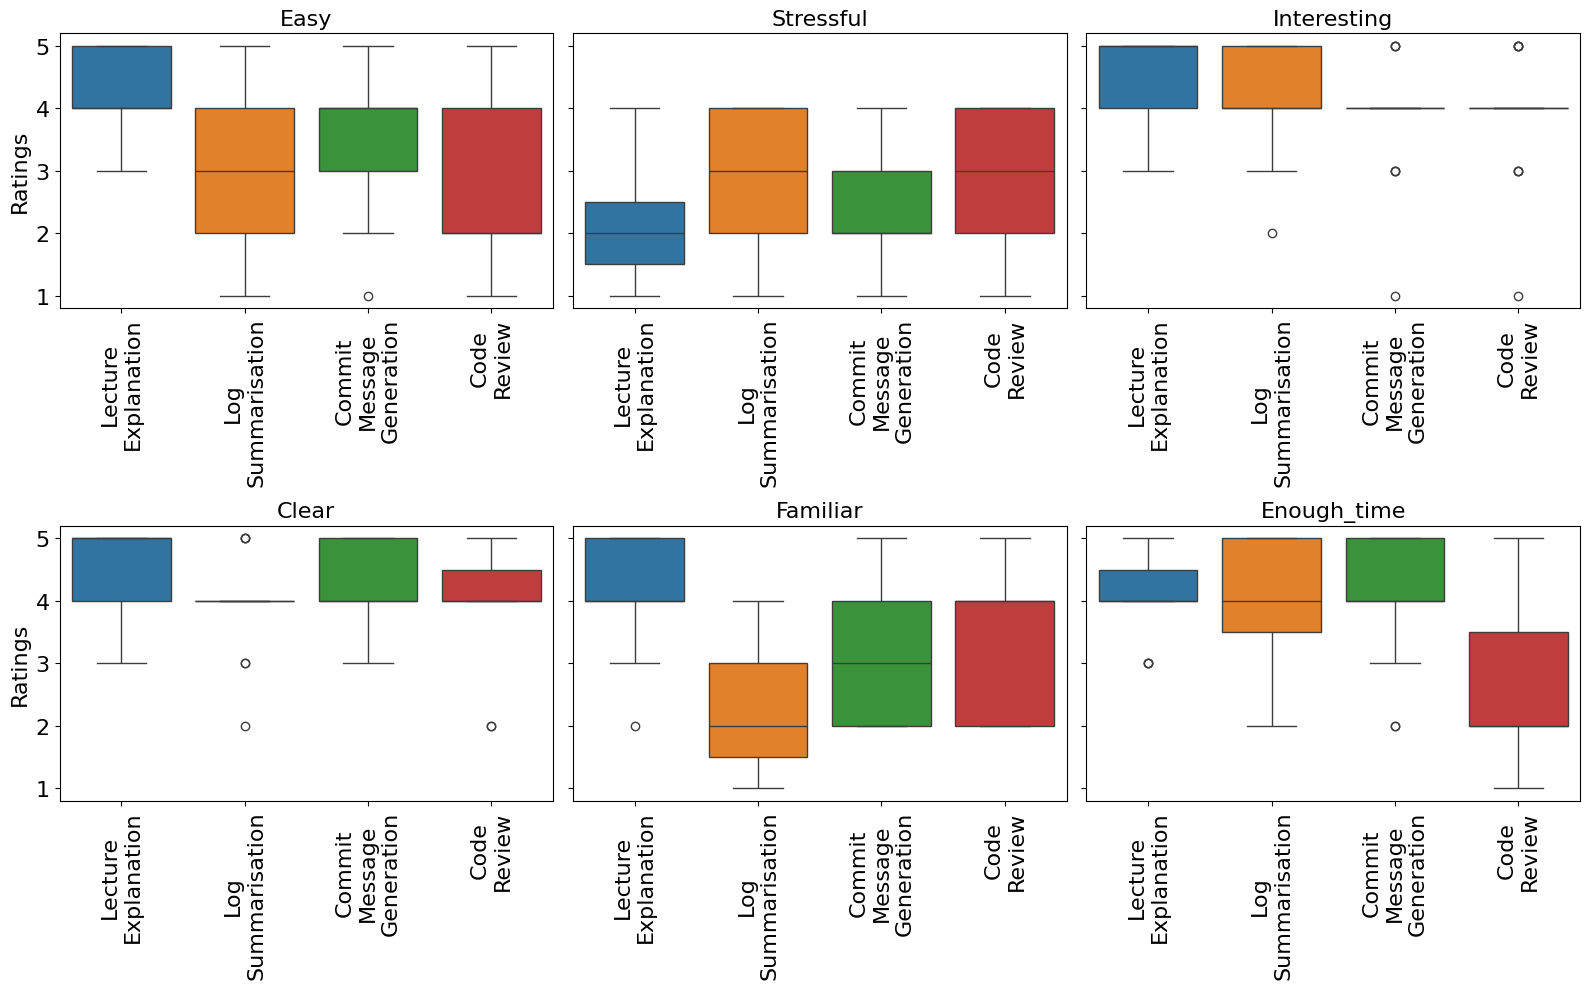

In [ ]:
#Plot for task perception items
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10), sharey=True)

task_labels = ['Lecture\nExplanation', 'Log\nSummarisation', 'Commit\nMessage\nGeneration', 'Code\nReview']
columns = ['easy', 'stressful', 'interesting', 'clear', 'familiar', 'enough_time']

for i, column in enumerate(columns):
    row_index = i // 3
    col_index = i % 3

    sns.boxplot(x='Task', y=column, hue='Task',data=task_perception_df, ax=axes[row_index, col_index])

    axes[row_index, col_index].set_title(column.capitalize(), fontsize=16)
    axes[row_index, col_index].set_xlabel('')
    axes[row_index, col_index].set_ylabel('Ratings', fontsize=16)
    axes[row_index, col_index].set_xticklabels(task_labels, rotation=90, fontsize=16)
    axes[row_index, col_index].tick_params(axis='y', labelsize=16)

plt.tight_layout()
plt.show()

-----easy-----
            df     sum_sq   mean_sq         F    PR(>F)
C(Task)    3.0  20.565789  6.855263  6.379592  0.000678
Residual  72.0  77.368421  1.074561       NaN       NaN
-----stressful-----
            df     sum_sq   mean_sq     F    PR(>F)
C(Task)    3.0   7.618421  2.539474  2.25  0.089809
Residual  72.0  81.263158  1.128655   NaN       NaN
-----interesting-----
            df     sum_sq   mean_sq         F    PR(>F)
C(Task)    3.0   6.776316  2.258772  3.212058  0.027921
Residual  72.0  50.631579  0.703216       NaN       NaN
-----clear-----
            df     sum_sq   mean_sq         F    PR(>F)
C(Task)    3.0   2.565789  0.855263  1.531414  0.213703
Residual  72.0  40.210526  0.558480       NaN       NaN
-----familiar-----
            df     sum_sq    mean_sq         F        PR(>F)
C(Task)    3.0  38.052632  12.684211  14.41196  1.898876e-07
Residual  72.0  63.368421   0.880117       NaN           NaN
-----enough_time-----
            df     sum_sq    mean_sq       

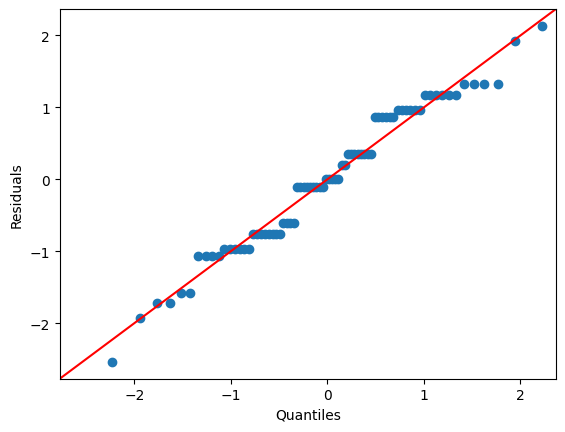

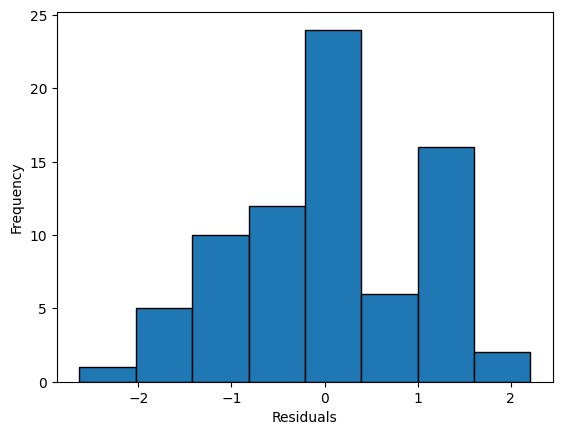

-----stressful-----


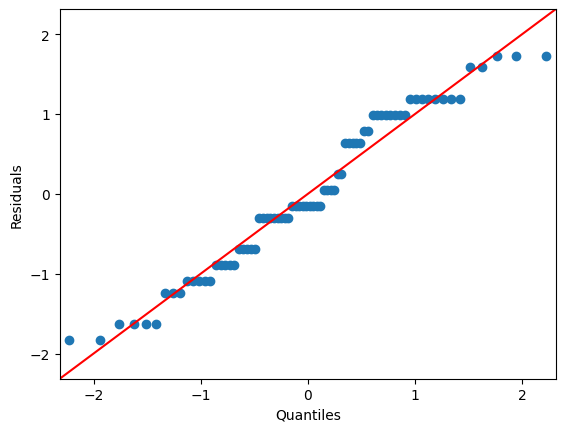

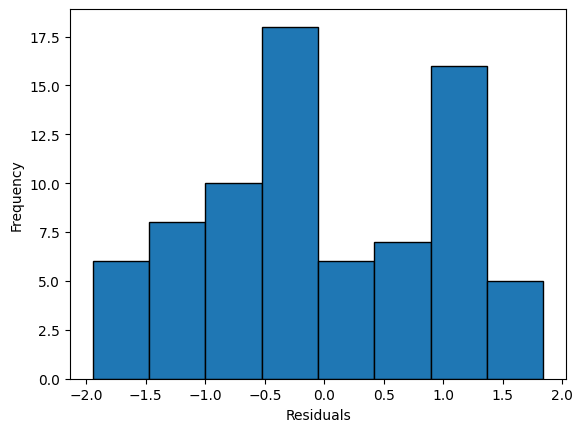

-----interesting-----


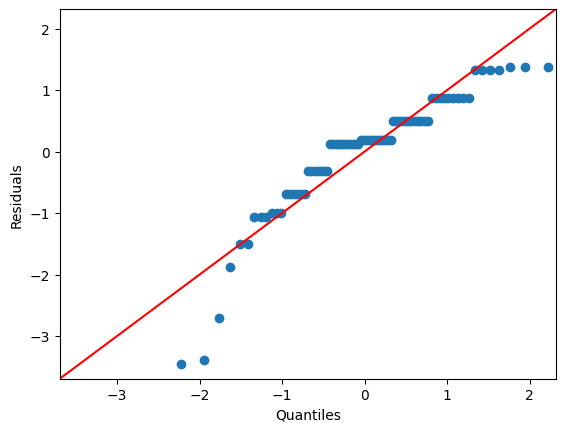

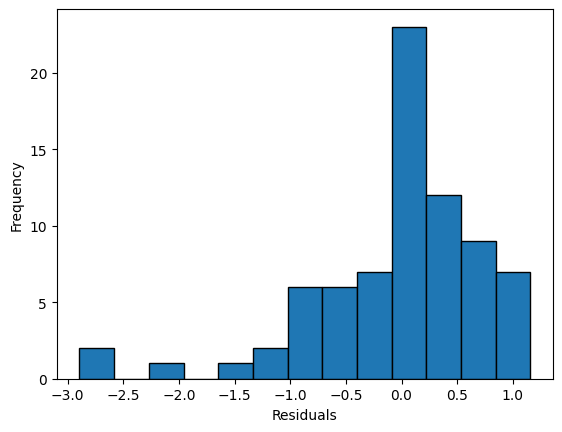

-----clear-----


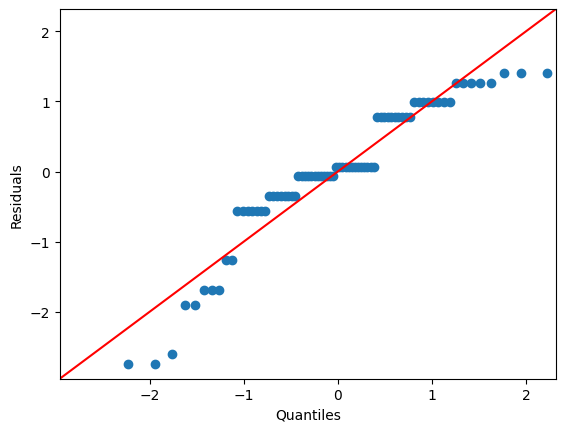

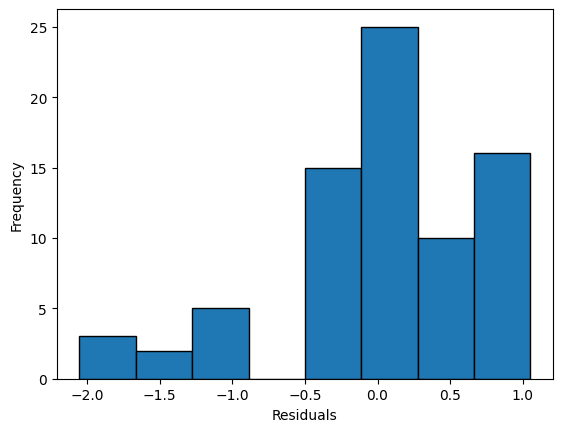

-----familiar-----


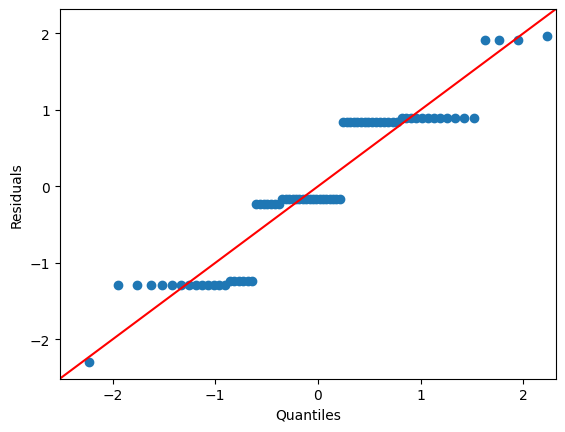

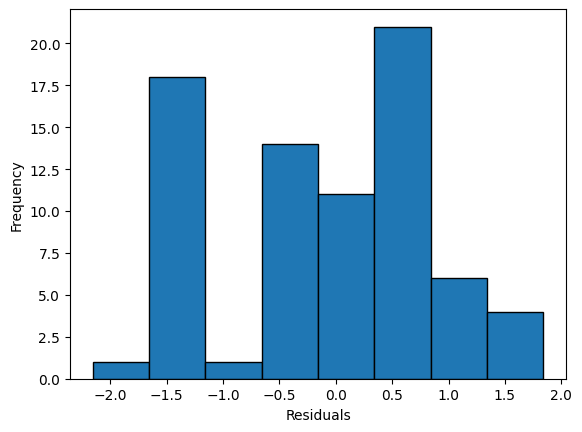

-----enough_time-----


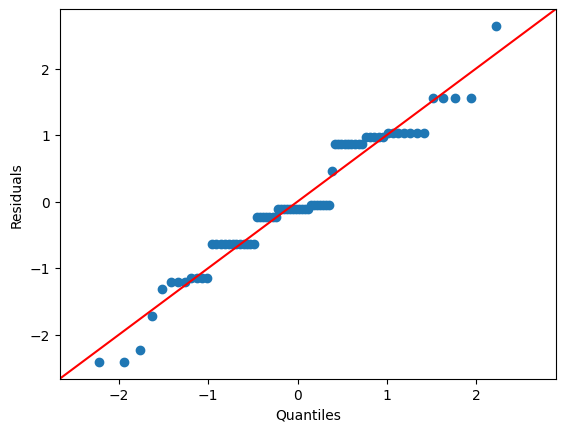

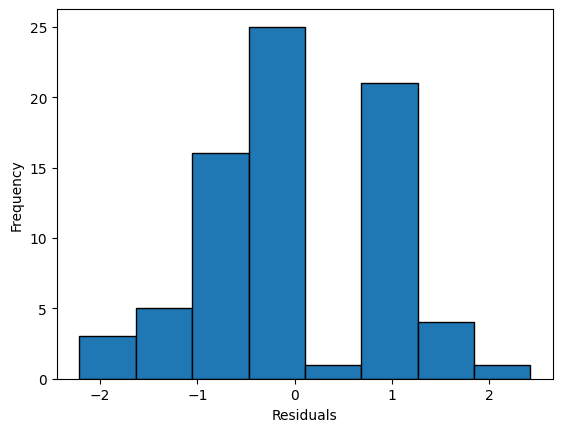

                 Parameter   Value
0      Test statistics (T)  4.2319
1  Degrees of freedom (Df)  3.0000
2                  p value  0.2375


In [ ]:
#One-Way ANOVA task perception items and assumption checks for each test
tp_res_dict = {}
bartlett_res_dict = {}
for item in columns_to_average_tp:
  res = stat()
  bartlett_res = stat()
  model_formula = f"{item} ~ C(Task)"
  task_perception_df.loc[:, item] = pd.to_numeric(task_perception_df[item], errors='coerce')
  res.anova_stat(df=task_perception_df, res_var=item, anova_model=model_formula)
  bartlett_res.bartlett(df=task_perception_df,res_var=item,xfac_var='Task')
  tp_res_dict[item] = res
  bartlett_res_dict[item] = bartlett_res
  print(f"-----{item}-----")
  print(res.anova_summary)

anova_assumption_checks(tp_res_dict,bartlett_res_dict)

In [4]:
#Cognitive Items
cognitive_columns = ['ParticipantId', 'Task', 'Q8', 'Q9', 'Q10', 'Q11', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20']
cognitive_df = post_task_complete_df[cognitive_columns]
meaningfull_column_names_cognitive = {
    'Task':'Task',
    'Q8': 'certain_before',
    'Q9': 'certain_first',
    'Q10': 'certain_during',
    'Q11': 'certain_end',
    'Q13': 'difficulty_before',
    'Q14': 'difficulty_first',
    'Q15': 'difficulty_during',
    'Q16': 'difficulty_end',
    'Q17': 'relevant_before',
    'Q18': 'relevant_first',
    'Q19': 'relevant_during',
    'Q20': 'relevant_end'
}
cognitive_df.drop(0, inplace=True)
columns_to_average_cognitive = list(meaningfull_column_names_cognitive.keys())[1:]
for column in list(meaningfull_column_names_cognitive.keys())[9:]:
  cognitive_df[column] = 6 - cognitive_df[column]
print(cognitive_df.head())
task_averages_cognitive = cognitive_df.groupby('Task')[columns_to_average_cognitive].agg(["mean","std"])
task_averages_cognitive.rename(columns=meaningfull_column_names_cognitive,inplace=True)
task_averages_cognitive

  ParticipantId                       Task Q8 Q9 Q10 Q11 Q13 Q14 Q15 Q16 Q17  \
1             1        Lecture Explanation  1  2   2   4   3   2   2   2   4   
2             1          Log Summarisation  4  3   4   3   2   4   4   3   2   
3             1  Commit Message Generation  3  4   5   5   3   2   2   2   2   
4             1                Code Review  4  4   3   2   2   2   2   4   3   
5             2          Log Summarisation  2  4   4   4   2   2   3   3   2   

  Q18 Q19 Q20  
1   5   5   5  
2   2   4   4  
3   3   4   4  
4   2   2   2  
5   4   4   4  


certain_before           certain_first            \
                                    mean       std          mean       std   
Task                                                                         
Code Review                     3.736842  1.194529      3.684211  1.157230   
Commit Message Generation       3.947368  0.911268      3.947368  1.025978   
Lecture Explanation             3.684211  1.416280      3.684211  1.002920   
Log Summarisation               3.210526  1.134262      3.368421  1.065130   

                          certain_during           certain_end            \
                                    mean       std        mean       std   
Task                                                                       
Code Review                     3.578947  1.017393    3.105263  1.196975   
Commit Message Generation       3.789474  0.917663    3.894737  0.936586   
Lecture Explanation             3.526316  1.020263    3.578947  0.901591   
Log Summarisation               3.684211  0.820070    3.526316  0.841191   

                          difficulty_before            ... difficulty_end  \
                                       mean       std  ...           mean   
Task                                                   ...                  
Code Review                        2.210526  0.976328  ...       2.894737   
Commit Message Generation          2.000000  0.942809  ...       2.000000   
Lecture Explanation                1.842105  1.014515  ...       2.315789   
Log Summarisation                  2.157895  1.167293  ...       2.421053   

                                    relevant_before           relevant_first  \
                                std            mean       std           mean   
Task                                                                           
Code Review                1.286457        3.000000  1.054093       3.052632   
Commit Message Generation  0.666667        3.000000  1.105542       3.578947   
Lecture Explanation        1.108183        3.052632  1.311220       3.684211   
Log Summarisation          1.169795        2.842105  1.067872       3.263158   

                                    relevant_during           relevant_end  \
                                std            mean       std         mean   
Task                                                                         
Code Review                1.129094        2.947368  1.078769     3.052632   
Commit Message Generation  0.901591        3.684211  0.885226     3.947368   
Lecture Explanation        1.204281        3.736842  0.991189     3.789474   
Log Summarisation          1.045738        3.473684  0.904828     3.526316   

                                     
                                std  
Task                                 
Code Review                1.129094  
Commit Message Generation  0.705036  
Lecture Explanation        1.134262  
Log Summarisation          0.904828  

[4 rows x 24 columns]

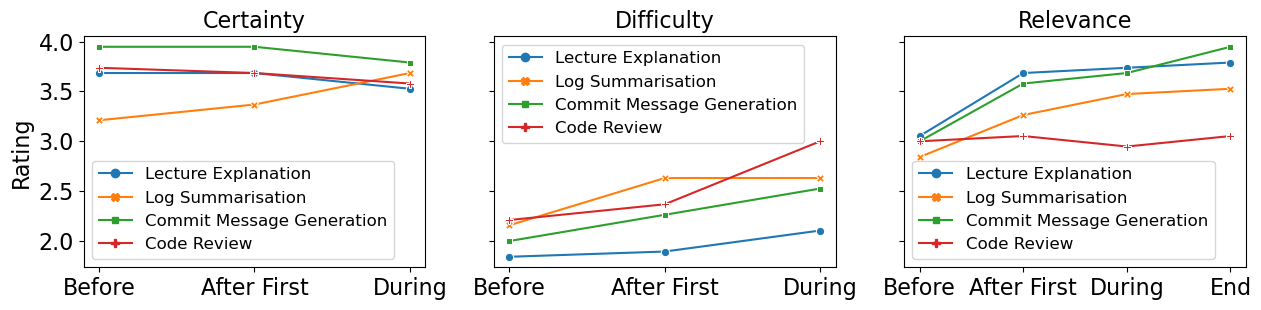

In [14]:
#Plot Cognitive Items
cognitive_df_renamed  = cognitive_df.rename(columns=meaningfull_column_names_cognitive)

tasks = cognitive_df_renamed['Task'].unique()
timeframes = ['before', 'first', 'during', 'end']
timeframe_labels = ['Before', 'After First', 'During', 'End']
timeframe_labels_three = ['Before', 'After First', 'During']

column_groups = [('certain', 'Certainty'), ('difficulty', 'Difficulty'), ('relevant', 'Relevance')]

fig, axs = plt.subplots(1, len(column_groups), figsize=(15, 3), sharey=True)
font_size = 16
for i, (column_prefix, title) in enumerate(column_groups):
    if i != 2:
      selected_timeframes = [f'{column_prefix}_{timeframe}' for timeframe in timeframes[:3]]
    else:
      selected_timeframes = [f'{column_prefix}_{timeframe}' for timeframe in timeframes]
    melted_df = cognitive_df_renamed.melt(id_vars=['ParticipantId', 'Task'],
                                           var_name='Timeframe',
                                           value_name='Score',
                                           value_vars=selected_timeframes)

    interaction_plot = sns.lineplot(data=melted_df,
                                    x='Timeframe',
                                    y='Score',
                                    hue='Task',
                                    style='Task',
                                    markers=True,
                                    dashes=False,
                                    errorbar=None,
                                    ax=axs[i])

    interaction_plot.set_title(title,fontsize=font_size)
    interaction_plot.set_ylabel('Rating', fontsize=font_size)
    interaction_plot.set_xlabel('')
    interaction_plot.legend(fontsize=12)
    interaction_plot.tick_params(axis='y', labelsize=font_size)

    if i != 2:
      interaction_plot.set_xticklabels(timeframe_labels_three, rotation=0,fontsize=font_size)
    else:
      interaction_plot.set_xticklabels(timeframe_labels, rotation=0,fontsize=font_size)

plt.show()

-----certain-----
                 df      sum_sq   mean_sq         F    PR(>F)
C(Task)         3.0    8.667763  2.889254  2.665996  0.048007
C(timeframe)    3.0    0.957237  0.319079  0.294423  0.829422
Residual      297.0  321.871711  1.083743       NaN       NaN
-----difficulty-----
                 df      sum_sq   mean_sq         F    PR(>F)
C(Task)         3.0   15.368421  5.122807  4.738628  0.003031
C(timeframe)    3.0   10.657895  3.552632  3.286206  0.021153
Residual      297.0  321.078947  1.081074       NaN       NaN
-----relevant-----
                 df      sum_sq   mean_sq         F    PR(>F)
C(Task)         3.0   15.694079  5.231360  4.858102  0.002582
C(timeframe)    3.0   15.825658  5.275219  4.898833  0.002444
Residual      297.0  319.819079  1.076832       NaN       NaN
-----certain-----


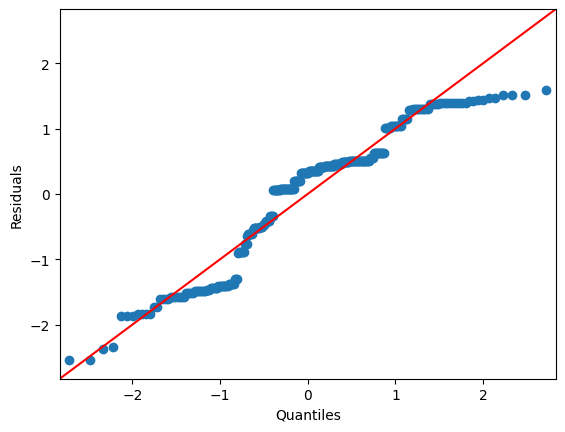

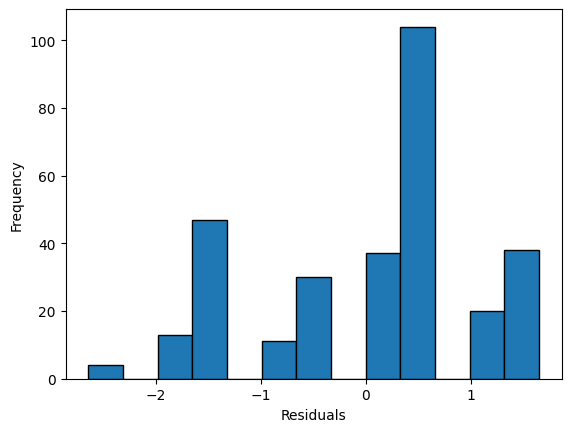

-----difficulty-----


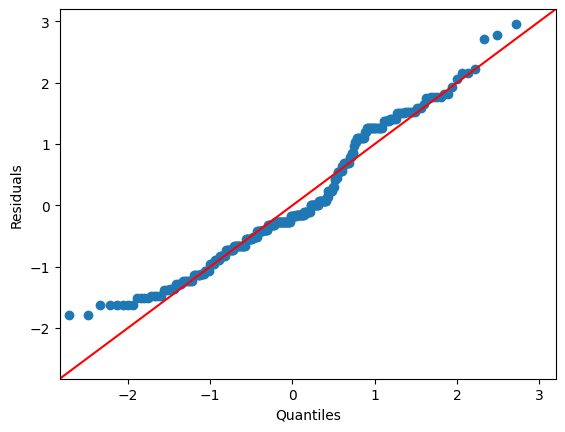

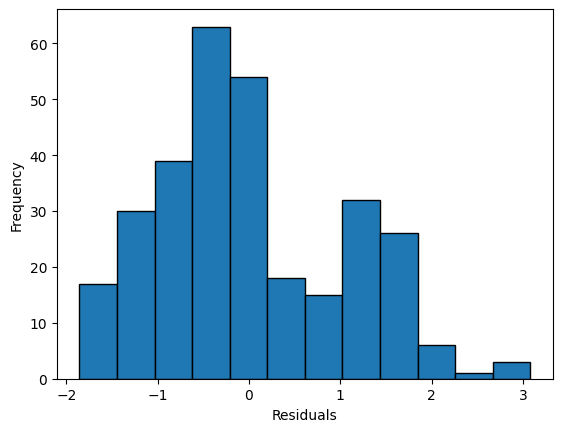

-----relevant-----


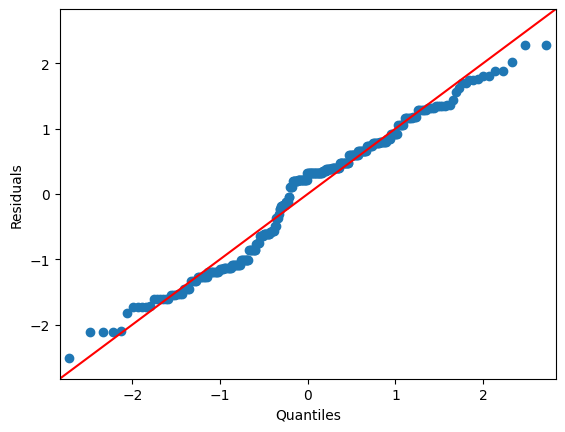

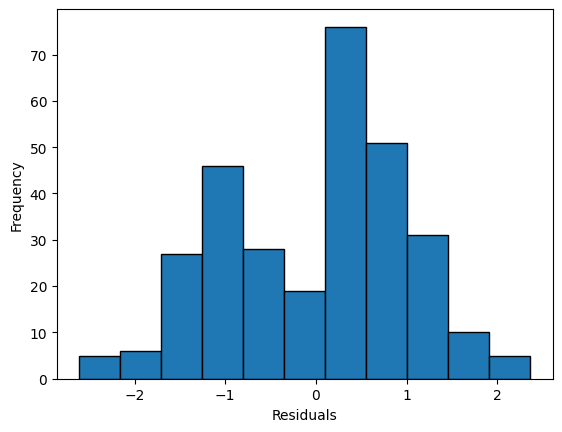

                 Parameter   Value
0      Test statistics (T)  3.8254
1  Degrees of freedom (Df)  3.0000
2                  p value  0.2809


In [ ]:
#Two-way ANOVA tests cogntive items and assumption checks
cognitive_items = ['certain','difficulty','relevant']
cog_result_dict,cog_bartlett_dict = two_way_anova_test(cognitive_df,cognitive_items,meaningfull_column_names_cognitive)
anova_assumption_checks(cog_result_dict,cog_bartlett_dict)

In [15]:
#Emotional Items
meaning_column_names_emotion = {
    'Q22': 'sadness_before',
    'Q23': 'sadness_first',
    'Q24': 'sadness_during',
    'Q25': 'sadness_end',
    'Q27': 'happiness_before',
    'Q28': 'happiness_first',
    'Q29': 'happiness_during',
    'Q30': 'happiness_end',
    'Q31': 'anger_before',
    'Q32': 'anger_first',
    'Q33': 'anger_during',
    'Q34': 'anger_end',
    'Q35': 'surprise_before',
    'Q36': 'surprise_first',
    'Q37': 'surprise_during',
    'Q38': 'surprise_end',
    'Q39': 'fear_before',
    'Q40': 'fear_first',
    'Q41': 'fear_during',
    'Q42': 'fear_end',
    'Q43': 'disgust_before',
    'Q44': 'disgust_first',
    'Q45': 'disgust_during',
    'Q46': 'disgust_end',
    'Q47': 'anxiety_before',
    'Q48': 'anxiety_first',
    'Q49': 'anxiety_during',
    'Q50': 'anxiety_end',
    'Q51': 'satisfaction_before',
    'Q52': 'satisfaction_first',
    'Q53': 'satisfaction_during',
    'Q54': 'satisfaction_end',
    'Q55.1': 'neutral_before',
    'Q56': 'neutral_first',
    'Q57.1': 'neutral_during',
    'Q58': 'neutral_end',
}
emotional_columns = ['ParticipantId','Task']
emotional_columns.extend(meaning_column_names_emotion.keys())
emotional_df = post_task_complete_df[emotional_columns]
emotional_df.drop(0, inplace=True)
columns_to_average_emotion = list(meaning_column_names_emotion.keys())
task_averages_emotion = emotional_df.groupby('Task')[columns_to_average_emotion].agg(["mean","std"])
task_averages_emotion.rename(columns=meaning_column_names_emotion,inplace=True)
task_averages_emotion

sadness_before           sadness_first            \
                                    mean       std          mean       std   
Task                                                                         
Code Review                     0.000000  0.000000      0.210526  0.418854   
Commit Message Generation       0.000000  0.000000      0.105263  0.315302   
Lecture Explanation             0.105263  0.458831      0.052632  0.229416   
Log Summarisation               0.052632  0.229416      0.052632  0.229416   

                          sadness_during           sadness_end            \
                                    mean       std        mean       std   
Task                                                                       
Code Review                     0.210526  0.418854    0.210526  0.535303   
Commit Message Generation       0.000000  0.000000    0.052632  0.229416   
Lecture Explanation             0.105263  0.315302    0.157895  0.501460   
Log Summarisation               0.263158  0.561951    0.263158  0.561951   

                          happiness_before            ... satisfaction_end  \
                                      mean       std  ...             mean   
Task                                                  ...                    
Code Review                       0.578947  0.837708  ...         0.842105   
Commit Message Generation         0.368421  0.495595  ...         1.894737   
Lecture Explanation               0.947368  1.129094  ...         1.789474   
Log Summarisation                 0.578947  0.961237  ...         1.210526   

                                    neutral_before           neutral_first  \
                                std           mean       std          mean   
Task                                                                         
Code Review                0.898342       1.578947  1.121298      1.263158   
Commit Message Generation  0.994135       1.842105  1.014515      1.263158   
Lecture Explanation        0.917663       1.578947  1.169795      1.105263   
Log Summarisation          1.031662       1.473684  1.218762      1.000000   

                                    neutral_during           neutral_end  \
                                std           mean       std        mean   
Task                                                                       
Code Review                1.194529       1.210526  1.031662    0.947368   
Commit Message Generation  1.045738       1.105263  1.048530    1.052632   
Lecture Explanation        0.994135       0.789474  0.976328    0.842105   
Log Summarisation          1.154701       1.052632  1.129094    1.052632   

                                     
                                std  
Task                                 
Code Review                0.970320  
Commit Message Generation  1.025978  
Lecture Explanation        1.067872  
Log Summarisation          1.078769  

[4 rows x 72 columns]

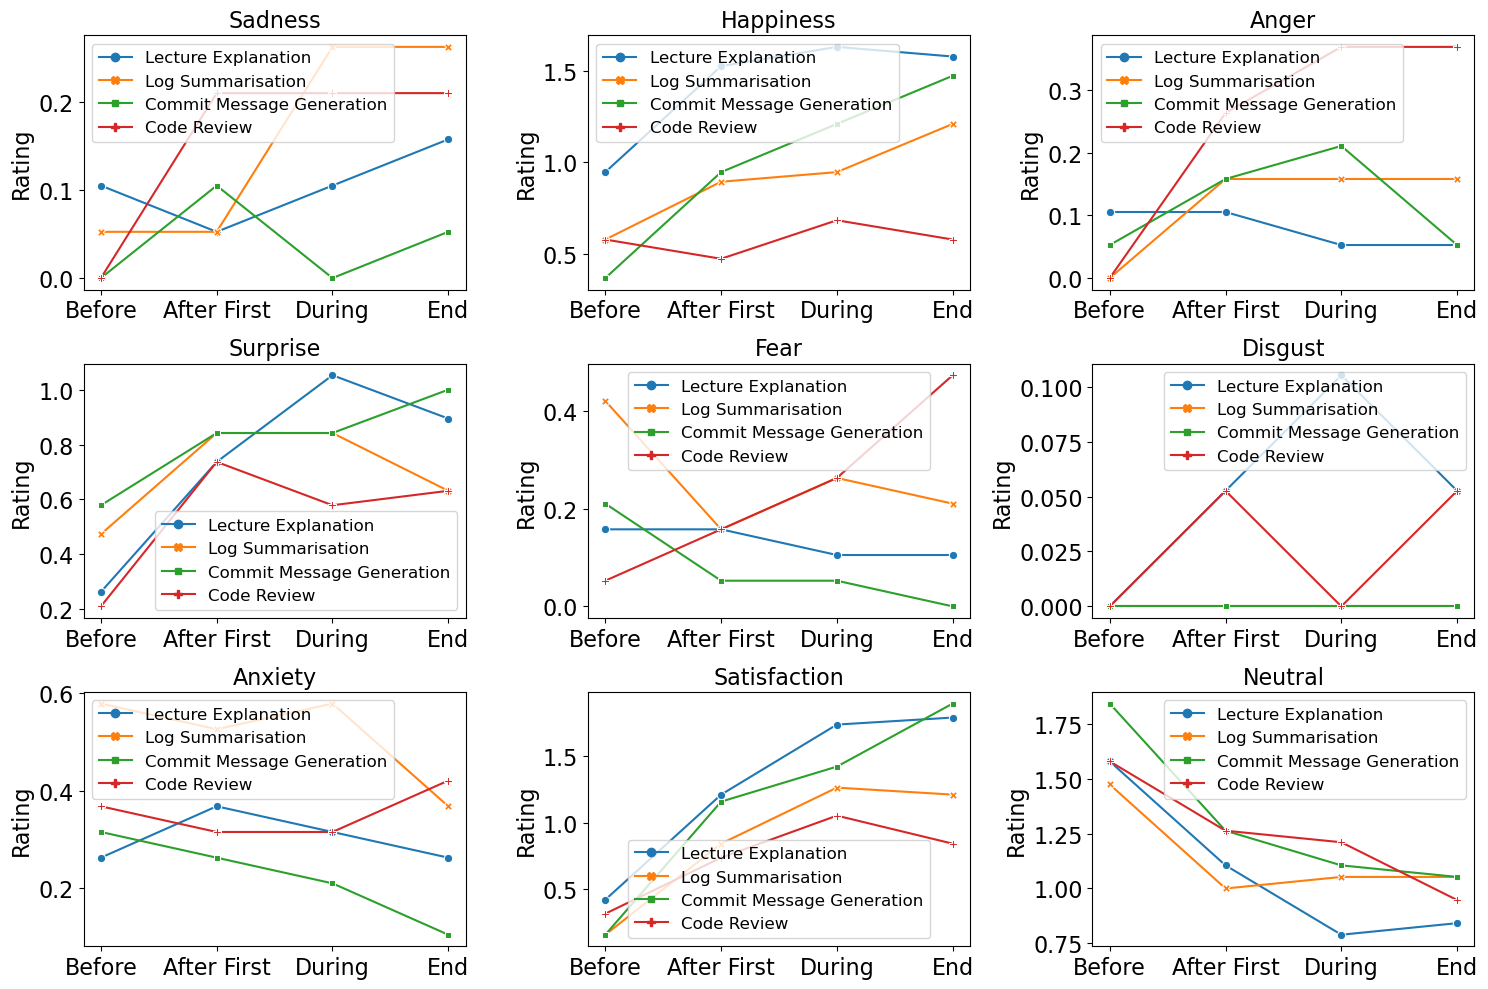

In [19]:
#Plot emotion items
emotional_df_renamed  = emotional_df.rename(columns=meaning_column_names_emotion)

tasks = emotional_df_renamed['Task'].unique()
timeframes = ['before', 'first', 'during', 'end']
timeframe_labels = ['Before', 'After First', 'During', 'End']

column_groups = [
    ('sadness', 'Sadness'),
    ('happiness', 'Happiness'),
    ('anger', 'Anger'),
    ('surprise', 'Surprise'),
    ('fear','Fear'),
    ('disgust','Disgust'),
    ('anxiety', 'Anxiety'),
    ('satisfaction', 'Satisfaction'),
    ('neutral', 'Neutral')
]

fig, axs = plt.subplots(3, 3, figsize=(15, 10))

for i, (column_prefix, title) in enumerate(column_groups):
    row = i // 3
    col = i % 3

    selected_timeframes = [f'{column_prefix}_{timeframe}' for timeframe in timeframes]

    melted_df = emotional_df_renamed.melt(id_vars=['ParticipantId', 'Task'],
                                           var_name='Timeframe',
                                           value_name='Rating',
                                           value_vars=selected_timeframes)

    interaction_plot = sns.lineplot(data=melted_df,
                                    x='Timeframe',
                                    y='Rating',
                                    hue='Task',
                                    style='Task',
                                    markers=True,
                                    dashes=False,
                                    errorbar=None,
                                    ax=axs[row, col])

    interaction_plot.set_title(title,fontsize=16)
    interaction_plot.set_ylabel('Rating',fontsize=16)
    interaction_plot.set_xlabel('')
    interaction_plot.tick_params(axis='y', labelsize=16)
    interaction_plot.legend(fontsize=12)
    interaction_plot.set_xticklabels(timeframe_labels, rotation=0,fontsize=16)


plt.tight_layout()

plt.show()

-----sadness-----
                 df     sum_sq   mean_sq         F    PR(>F)
C(Task)         3.0   0.720395  0.240132  1.805396  0.146221
C(timeframe)    3.0   0.746711  0.248904  1.871346  0.134455
Residual      297.0  39.503289  0.133008       NaN       NaN
-----happiness-----
                 df      sum_sq   mean_sq          F        PR(>F)
C(Task)         3.0   27.430921  9.143640  10.952426  7.656996e-07
C(timeframe)    3.0   15.457237  5.152412   6.171657  4.417716e-04
Residual      297.0  247.950658  0.834851        NaN           NaN
-----anger-----
                 df     sum_sq   mean_sq         F    PR(>F)
C(Task)         3.0   1.273026  0.424342  2.494174  0.060125
C(timeframe)    3.0   1.115132  0.371711  2.184819  0.089897
Residual      297.0  50.529605  0.170133       NaN       NaN
-----surprise-----
                 df      sum_sq   mean_sq         F    PR(>F)
C(Task)         3.0    3.078947  1.026316  1.244681  0.293690
C(timeframe)    3.0   10.184211  3.394737  4.11

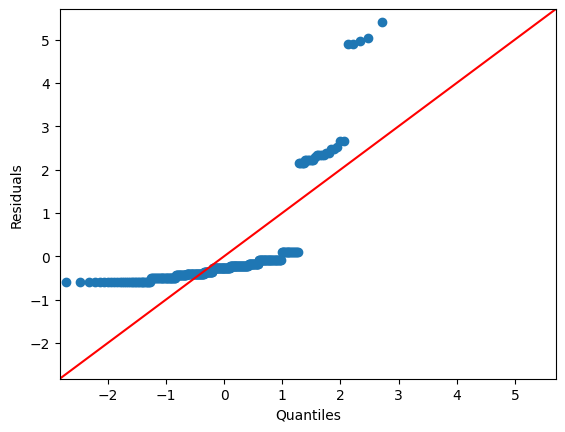

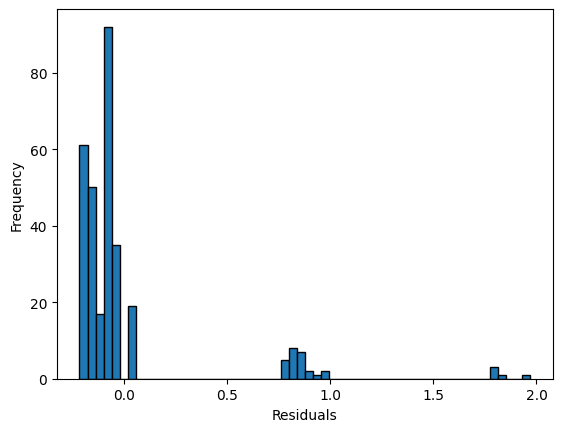

-----happiness-----


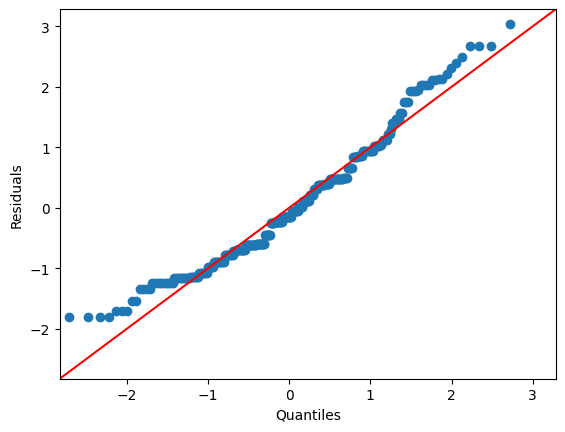

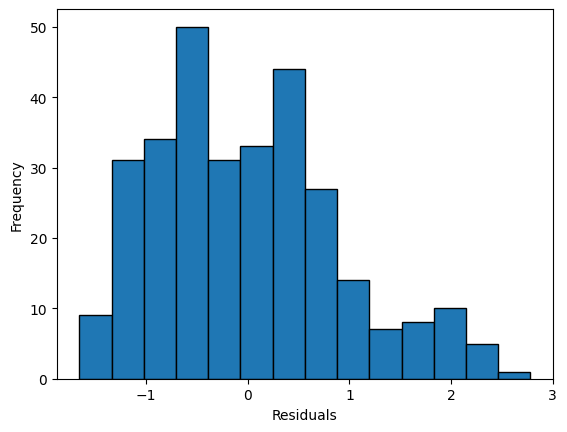

-----anger-----


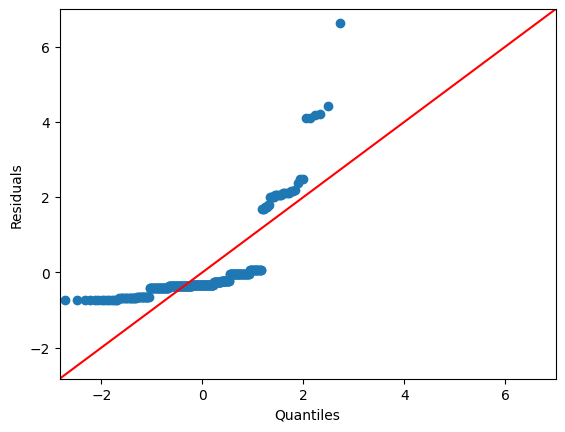

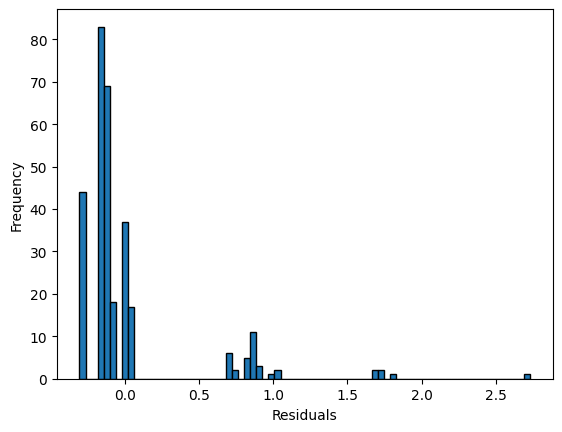

-----surprise-----


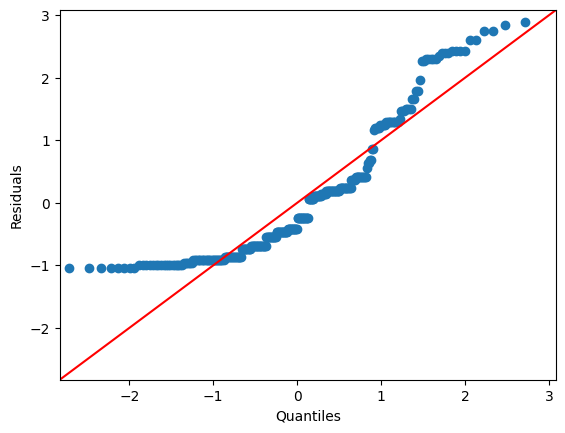

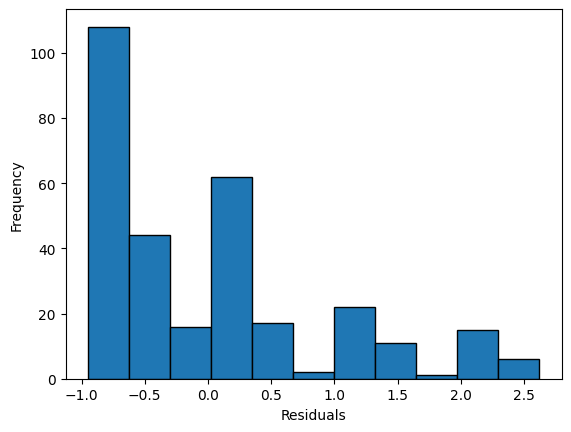

-----fear-----


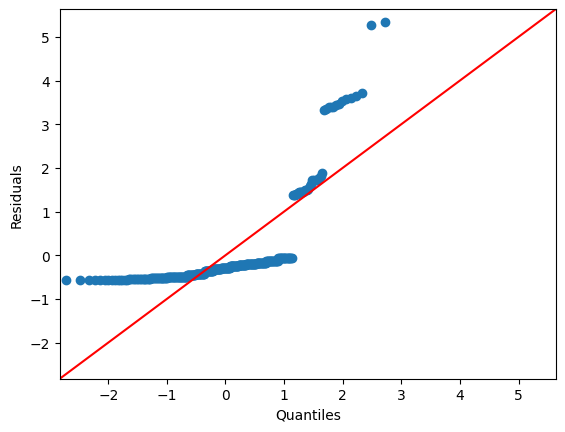

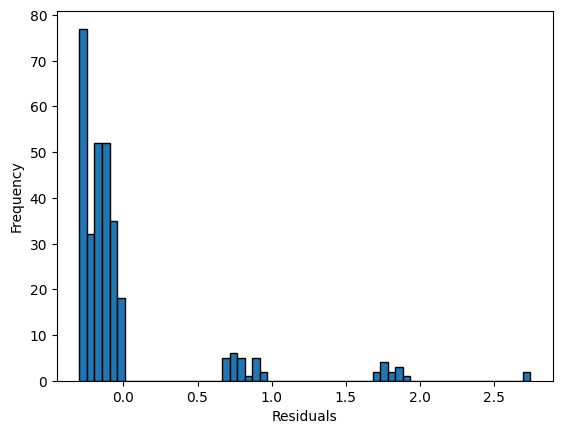

-----disgust-----


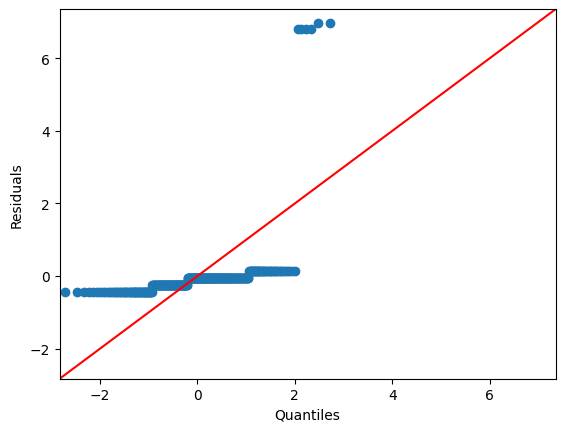

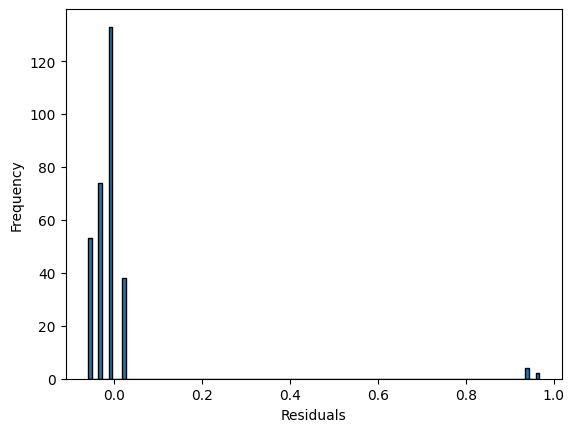

-----anxiety-----


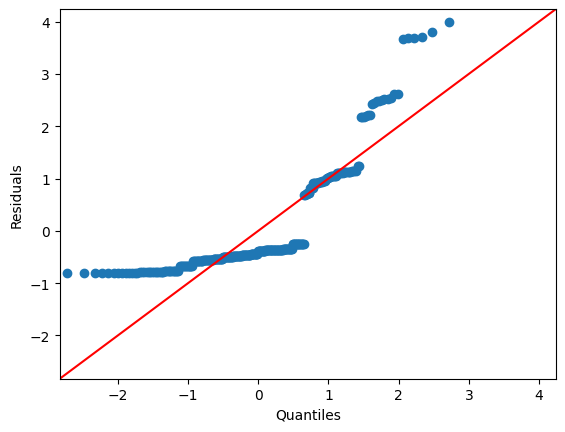

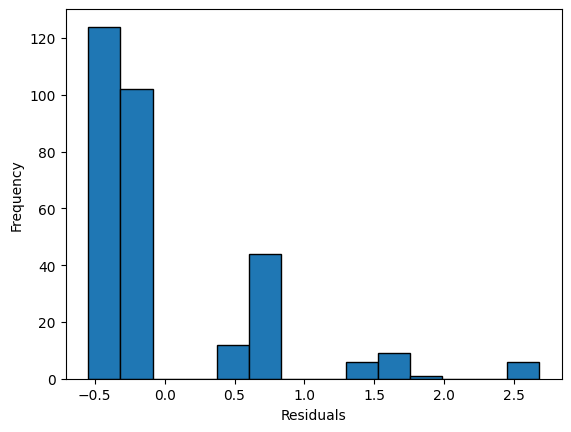

-----satisfaction-----


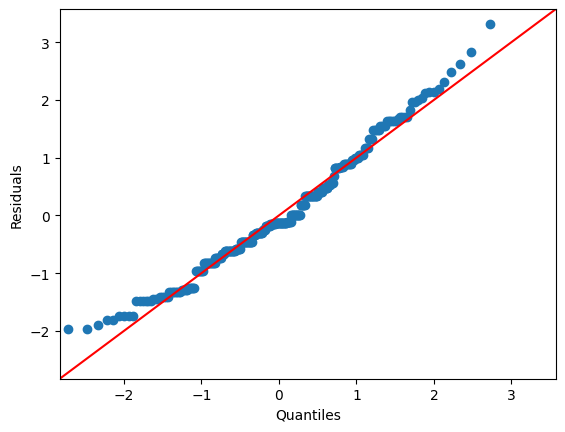

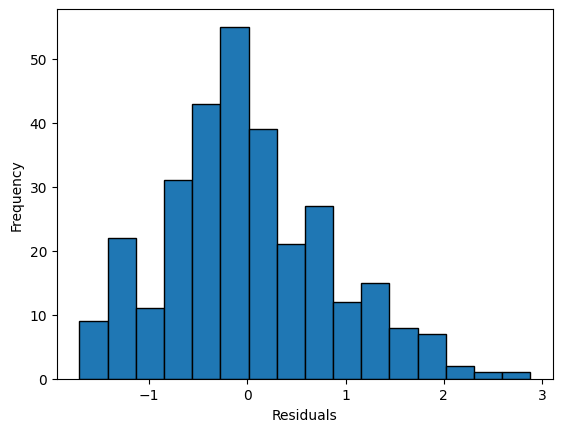

-----neutral-----


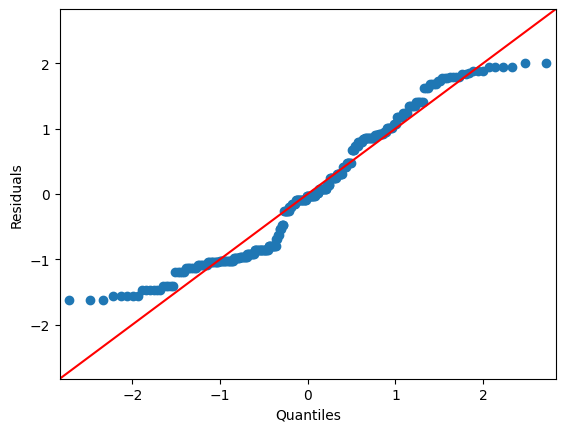

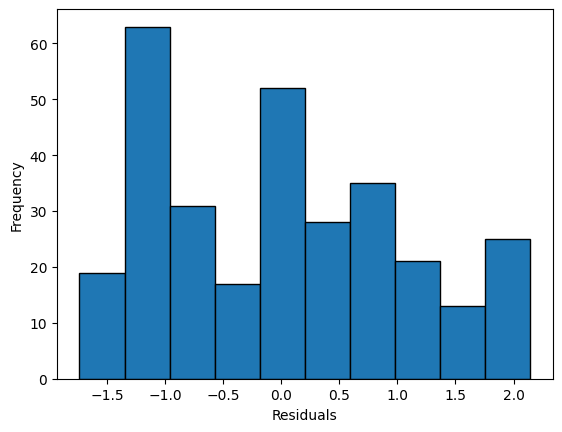

                 Parameter   Value
0      Test statistics (T)  0.4255
1  Degrees of freedom (Df)  3.0000
2                  p value  0.9349


In [ ]:
emotion_items = ['sadness','happiness','anger','surprise','fear','disgust','anxiety','satisfaction','neutral']
emotion_result_dict,emotion_bartlett_dict = two_way_anova_test(emotional_df,emotion_items,meaning_column_names_emotion)

anova_assumption_checks(emotion_result_dict,emotion_bartlett_dict)

In [ ]:
#Post-Hoc Comparison of significant effects
significant_effects_emotion = ['happiness','surprise','satisfaction','neutral']
significant_effects_cognitive = ['difficulty','relevant']
tukey_emotion_results, tukey_emotion_significant_results = tukey_hsd_test(emotional_df,emotion_items,meaning_column_names_emotion,significant_effects_emotion)
print(tukey_emotion_significant_results)
tukey_cognitive_results, tukey_cognitive_significant_results = tukey_hsd_test(cognitive_df,cognitive_items,meaningfull_column_names_cognitive,significant_effects_cognitive)
print(tukey_cognitive_significant_results)

{'happiness_Task':                       group1                     group2      Diff     Lower  \
0        Lecture Explanation          Log Summarisation  0.513158  0.130192   
1        Lecture Explanation  Commit Message Generation  0.421053  0.038087   
2        Lecture Explanation                Code Review  0.842105  0.459139   
5  Commit Message Generation                Code Review  0.421053  0.038087   

      Upper   q-value   p-value  
0  0.896124  4.896135  0.003428  
1  0.804019  4.017342  0.024712  
2  1.225071  8.034683  0.001000  
5  0.804019  4.017342  0.024712  , 'happiness_timeframe':              group1            group2      Diff     Lower     Upper   q-value  \
1  happiness_before  happiness_during  0.500000  0.117034  0.882966  4.770593   
2  happiness_before     happiness_end  0.592105  0.209139  0.975071  5.649387   

    p-value  
1  0.004649  
2  0.001000  , 'surprise_Task': Empty DataFrame
Columns: [group1, group2, Diff, Lower, Upper, q-value, p-value]
Index: 